In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.1 MB/s eta 0:00:00


In [ ]:
!pip install pyrocko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.6 MB/s eta 0:00:00


In [ ]:
!pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6084 sha256=1d3f88b62e8a1bfa4ef6ec9e849f1a39086580a2570c2ed2ce804c240b42656e
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
import numpy as np
import pandas as pd
import utm
from math import sin, cos, radians, atan2

# Load data from CSV
sampled_points_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
sampled_points = pd.read_csv(sampled_points_csv)

# Extract latitude, longitude, and interferogram values
latitude = sampled_points['Lat'].values
longitude = sampled_points['Long'].values
sampled_values = sampled_points['Interferogram'].values

# Define fault parameters (adjust as necessary)
fault_parameters = [
    {"lat": 6.383, "lon": 37.736, "depth": 19.6, "strike": 24, "dip": 64, "rake": -74},
    {"lat": 6.368, "lon": 37.738, "depth": 17.4, "strike": 206, "dip": 60, "rake": -100},
    {"lat": 6.880, "lon": 38.012, "depth": 11.5, "strike": 64, "dip": 78, "rake": -86},
    {"lat": 6.333, "lon": 37.731, "depth": 16.8, "strike": 202, "dip": 56, "rake": -92}
]

# Function to convert latitude and longitude to UTM coordinates
def latlon_to_utm(lat, lon):
    easting, northing, zone_number, zone_letter = utm.from_latlon(lat, lon)
    return easting, northing

# Function to compute displacements using a simplified Okada model
def compute_displacements(fault_params, latitudes, longitudes):
    displacements_north = np.zeros_like(latitudes)
    displacements_east = np.zeros_like(latitudes)
    displacements_vertical = np.zeros_like(latitudes)

    for lat, lon in zip(latitudes, longitudes):
        easting, northing = latlon_to_utm(lat, lon)
        fault_easting, fault_northing = latlon_to_utm(fault_params['lat'], fault_params['lon'])

        # Compute distance between the observation point and the fault
        dx = easting - fault_easting
        dy = northing - fault_northing
        distance = np.sqrt(dx**2 + dy**2 + fault_params['depth']**2)

        # Simplified displacement model (placeholders for demonstration)
        displacement_north = fault_params['strike'] / distance
        displacement_east = fault_params['dip'] / distance
        displacement_vertical = fault_params['depth'] / distance

        displacements_north += displacement_north
        displacements_east += displacement_east
        displacements_vertical += displacement_vertical

    return displacements_north, displacements_east, displacements_vertical

# Initialize displacement arrays
displacement_north = np.zeros_like(latitude)
displacement_east = np.zeros_like(latitude)
displacement_vertical = np.zeros_like(latitude)

# Compute displacements for each fault event
for fault in fault_parameters:
    d_north, d_east, d_vertical = compute_displacements(fault, latitude, longitude)
    displacement_north += d_north
    displacement_east += d_east
    displacement_vertical += d_vertical

# Combine the interferogram data with the computed displacements
simulated_data = pd.DataFrame({
    "Latitude": latitude,
    "Longitude": longitude,
    "Interferogram_Displacement": sampled_values,
    "Displacement_North": displacement_north,
    "Displacement_East": displacement_east,
    "Displacement_Vertical": displacement_vertical
})

# Save results to CSV
output_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yy.csv'
simulated_data.to_csv(output_csv, index=False)

print(f"Results saved to {output_csv}")


Results saved to /content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yy.csv


In [ ]:
!/content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/


/bin/bash: line 1: /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/: Is a directory


In [ ]:
# Initialize Pyrocko GF Engine
store_superdir = '/content/drive/MyDrive/Unwarped_phase/Newtry'
store_id = 'global_2s'

# Verify the store directory and files
store_path = os.path.join(store_superdir, store_id)
if not os.path.exists(store_path):
    raise FileNotFoundError(f"GF store directory {store_path} does not exist.")
else:
    required_files = ['P.phase', 'S.phase', 'config']
    for file in required_files:
        if not os.path.exists(os.path.join(store_path, file)):
            raise FileNotFoundError(f"Required file {file} not found in {store_path}")

engine = gf.LocalEngine(store_superdirs=[store_superdir])


In [ ]:
engine = gf.LocalEngine(store_superdirs=[store_superdir])

In [ ]:
import os

store_superdir = '/content/drive/MyDrive/Unwarped_phase/Newtry'
store_id = 'global_2s'
store_path = os.path.join(store_superdir, store_id)

print(f"Store path: {store_path}")
print("Contents of the store directory:")

for root, dirs, files in os.walk(store_path):
    for file in files:
        print(file)


Store path: /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s
Contents of the store directory:
config
decimated.html
qssp
end.phase
begin.phase
P.phase
S.phase
p(1).phase
s(1).phase
index_2


In [ ]:
from pyrocko import gf

store_superdir = '/content/drive/MyDrive/Unwarped_phase/Newtry'
store_id = 'global_2s'

engine = gf.LocalEngine(store_superdirs=[store_superdir])


In [ ]:
import os

# Verify the store directory and contents
store_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/global_2s'
if os.path.exists(store_path):
    print(f"Store path exists: {store_path}")
    print("Contents of the store directory:")
    print(os.listdir(store_path))
else:
    print(f"Store path does not exist: {store_path}")


Store path exists: /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s
Contents of the store directory:
['config', 'decimated.html', 'qssp', 'end.phase', 'begin.phase', 'P.phase', 'S.phase', 'p(1).phase', 's(1).phase', 'index_2']


In [ ]:
from pyrocko import gf
import os

# Define the store directory and ID
store_superdir = '/content/drive/MyDrive/Unwarped_phase/Newtry'
store_id = 'global_2s'

# Verify the store directory and contents
store_path = os.path.join(store_superdir, store_id)
if os.path.exists(store_path):
    print(f"Store path exists: {store_path}")
    print("Contents of the store directory:")
    for item in os.listdir(store_path):
        print(item)
else:
    print(f"Store path does not exist: {store_path}")

# Initialize the local engine
engine = gf.LocalEngine(store_superdirs=[store_superdir])

# Verify the store
try:
    store = engine.get_store(store_id)
    print(f"Store '{store_id}' successfully loaded with GF store directory: {store_superdir}")
except gf.NoSuchStore as e:
    print(f"Error: {e}")
    print("Searched folders:")
    for folder in engine.iter_store_dirs():
        print(folder)
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Store path exists: /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s
Contents of the store directory:
config
decimated.html
qssp
end.phase
begin.phase
P.phase
S.phase
p(1).phase
s(1).phase
index_2
Error: no GF store with id "global_2s" found. Searched folders:
  
Searched folders:


In [ ]:
import os

store_superdir = '/content/drive/MyDrive/Unwarped_phase/Newtry'
store_id = 'global_2s'
store_path = os.path.join(store_superdir, store_id)

# Check and rename the index file if necessary
index_file = os.path.join(store_path, 'index_2')
if os.path.exists(index_file):
    new_index_file = os.path.join(store_path, 'index')
    if not os.path.exists(new_index_file):
        os.rename(index_file, new_index_file)
        print(f"Renamed 'index_2' to 'index'")
    else:
        print(f"'index' file already exists.")
else:
    print(f"'index_2' file does not exist.")


Renamed 'index_2' to 'index'


In [ ]:
from pyrocko import gf

# Initialize the local engine
engine = gf.LocalEngine(store_superdirs=[store_superdir])

# Verify the store
try:
    store = engine.get_store(store_id)
    print(f"Store '{store_id}' successfully loaded with GF store directory: {store_superdir}")
except gf.NoSuchStore as e:
    print(f"Error: {e}")
    print("Searched folders:")
    for folder in engine.iter_store_dirs():
        print(folder)
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Error: no GF store with id "global_2s" found. Searched folders:
  
Searched folders:


In [ ]:
import os

store_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/global_2s'
for root, dirs, files in os.walk(store_path):
    for name in files:
        file_path = os.path.join(root, name)
        if not os.access(file_path, os.R_OK):
            print(f"File {file_path} is not readable.")
        else:
            print(f"File {file_path} has read permissions.")


File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/config has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/decimated.html has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/qssp has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/end.phase has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/begin.phase has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/P.phase has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/S.phase has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/p(1).phase has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/s(1).phase has read permissions.
File /content/drive/MyDrive/Unwarped_phase/Newtry/global_2s/index has read permissions.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install cartopy pyrocko utm


In [ ]:
import numpy as np
import pandas as pd
import utm
from math import sin, cos, radians, atan2

# Load data from CSV
sampled_points_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
sampled_points = pd.read_csv(sampled_points_csv)

# Extract latitude, longitude, and interferogram values
latitude = sampled_points['Lat'].values
longitude = sampled_points['Long'].values
sampled_values = sampled_points['Interferogram'].values

# Define fault parameters
fault_parameters = [
    {"lat": 6.383, "lon": 37.736, "depth": 19.6, "strike": 24, "dip": 64, "rake": -74},
    {"lat": 6.368, "lon": 37.738, "depth": 17.4, "strike": 206, "dip": 60, "rake": -100},
    {"lat": 6.880, "lon": 38.012, "depth": 11.5, "strike": 64, "dip": 78, "rake": -86},
    {"lat": 6.333, "lon": 37.731, "depth": 16.8, "strike": 202, "dip": 56, "rake": -92}
]


In [ ]:
# Function to convert latitude and longitude to UTM coordinates
def latlon_to_utm(lat, lon):
    easting, northing, zone_number, zone_letter = utm.from_latlon(lat, lon)
    return easting, northing

# Function to compute displacements using a simplified Okada model
def compute_displacements(fault_params, latitudes, longitudes):
    displacements_north = np.zeros_like(latitudes)
    displacements_east = np.zeros_like(latitudes)
    displacements_vertical = np.zeros_like(latitudes)

    for lat, lon in zip(latitudes, longitudes):
        easting, northing = latlon_to_utm(lat, lon)
        fault_easting, fault_northing = latlon_to_utm(fault_params['lat'], fault_params['lon'])

        # Compute distance between the observation point and the fault
        dx = easting - fault_easting
        dy = northing - fault_northing
        distance = np.sqrt(dx**2 + dy**2 + fault_params['depth']**2)

        # Simplified displacement model (placeholders for demonstration)
        displacement_north = fault_params['strike'] / distance
        displacement_east = fault_params['dip'] / distance
        displacement_vertical = fault_params['depth'] / distance

        displacements_north += displacement_north
        displacements_east += displacement_east
        displacements_vertical += displacement_vertical

    return displacements_north, displacements_east, displacements_vertical

# Initialize displacement arrays
displacement_north = np.zeros_like(latitude)
displacement_east = np.zeros_like(latitude)
displacement_vertical = np.zeros_like(latitude)

# Compute displacements for each fault event
for fault in fault_parameters:
    d_north, d_east, d_vertical = compute_displacements(fault, latitude, longitude)
    displacement_north += d_north
    displacement_east += d_east
    displacement_vertical += d_vertical

# Combine the interferogram data with the computed displacements
simulated_data = pd.DataFrame({
    "Latitude": latitude,
    "Longitude": longitude,
    "Interferogram_Displacement": sampled_values,
    "Displacement_North": displacement_north,
    "Displacement_East": displacement_east,
    "Displacement_Vertical": displacement_vertical
})

# Save results to CSV
output_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yy.csv'
simulated_data.to_csv(output_csv, index=False)

print(f"Results saved to {output_csv}")


Results saved to /content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yy.csv


In [ ]:
import os
from pyrocko import gf

# Verify the store directory and contents
store_superdir = '/content/drive/MyDrive/Unwarped_phase/Newtry'
store_id = 'global_2s'
store_path = os.path.join(store_superdir, store_id)

# Check and rename the index file if necessary
index_file = os.path.join(store_path, 'index_2')
if os.path.exists(index_file):
    new_index_file = os.path.join(store_path, 'index')
    if not os.path.exists(new_index_file):
        os.rename(index_file, new_index_file)
        print(f"Renamed 'index_2' to 'index'")
    else:
        print(f"'index' file already exists.")
else:
    print(f"'index_2' file does not exist.")

# Initialize Pyrocko GF Engine
engine = gf.LocalEngine(store_superdirs=[store_superdir])

# Verify GF store
try:
    store = engine.get_store(store_id)
    print(f"Successfully loaded GF store with id '{store_id}'")
except Exception as e:
    print(f"Error: {e}")


'index_2' file does not exist.
Error: no GF store with id "global_2s" found. Searched folders:
  


In [ ]:
import numpy as np
import pandas as pd
import utm

# Load the input data (assuming it is saved in 'input_data.csv')
input_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
data = pd.read_csv(input_csv)

latitude = data['Lat'].values
longitude = data['Long'].values

# Define the fault parameters (example)
fault_parameters = [
    {'lat': 11.5, 'lon': 41.2, 'strike': 0.1, 'dip': 0.05, 'depth': 10},
    # Add more fault events if necessary
]

# Function to convert latitude and longitude to UTM coordinates
def latlon_to_utm(lat, lon):
    easting, northing, zone_number, zone_letter = utm.from_latlon(lat, lon)
    return easting, northing

# Function to compute displacements using a simplified Okada model
def compute_displacements(fault_params, latitudes, longitudes):
    displacements_north = np.zeros_like(latitudes)
    displacements_east = np.zeros_like(latitudes)
    displacements_vertical = np.zeros_like(latitudes)

    for i, (lat, lon) in enumerate(zip(latitudes, longitudes)):
        easting, northing = latlon_to_utm(lat, lon)
        fault_easting, fault_northing = latlon_to_utm(fault_params['lat'], fault_params['lon'])

        # Compute distance between the observation point and the fault
        dx = easting - fault_easting
        dy = northing - fault_northing
        distance = np.sqrt(dx**2 + dy**2 + fault_params['depth']**2)

        # Simplified displacement model (placeholders for demonstration)
        displacement_north = fault_params['strike'] / distance
        displacement_east = fault_params['dip'] / distance
        displacement_vertical = fault_params['depth'] / distance

        displacements_north[i] += displacement_north
        displacements_east[i] += displacement_east
        displacements_vertical[i] += displacement_vertical

    return displacements_north, displacements_east, displacements_vertical

# Initialize displacement arrays
displacement_north = np.zeros_like(latitude)
displacement_east = np.zeros_like(latitude)
displacement_vertical = np.zeros_like(latitude)

# Compute displacements for each fault event
for fault in fault_parameters:
    d_north, d_east, d_vertical = compute_displacements(fault, latitude, longitude)
    displacement_north += d_north
    displacement_east += d_east
    displacement_vertical += d_vertical

# Combine the interferogram data with the computed displacements
simulated_data = pd.DataFrame({
    "Latitude": latitude,
    "Longitude": longitude,
    "Interferogram_Displacement": data['Interferogram'].values,
    "Displacement_North": displacement_north,
    "Displacement_East": displacement_east,
    "Displacement_Vertical": displacement_vertical
})

# Save results to CSV
output_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yycc.csv'
simulated_data.to_csv(output_csv, index=False)

print(f"Results saved to {output_csv}")


Results saved to /content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yycc.csv


In [ ]:
import numpy as np
import pandas as pd
import utm

# Load the input data
input_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
data = pd.read_csv(input_csv)

latitude = data['Lat'].values
longitude = data['Long'].values

# Define the fault parameters (example, in meters)
fault_parameters = [
    {'lat': 11.5, 'lon': 41.2, 'strike_slip': 0.1, 'dip_slip': 0.05, 'depth': 10000},  # Depth in meters
    # Add more fault events if necessary
]

# Function to convert latitude and longitude to UTM coordinates
def latlon_to_utm(lat, lon):
    easting, northing, zone_number, zone_letter = utm.from_latlon(lat, lon)
    return easting, northing

# Function to compute displacements using a simplified Okada model
def compute_displacements(fault_params, latitudes, longitudes):
    displacements_north = np.zeros_like(latitudes)
    displacements_east = np.zeros_like(latitudes)
    displacements_vertical = np.zeros_like(latitudes)

    for i, (lat, lon) in enumerate(zip(latitudes, longitudes)):
        easting, northing = latlon_to_utm(lat, lon)
        fault_easting, fault_northing = latlon_to_utm(fault_params['lat'], fault_params['lon'])

        # Compute distance between the observation point and the fault
        dx = easting - fault_easting
        dy = northing - fault_northing
        distance = np.sqrt(dx**2 + dy**2 + fault_params['depth']**2)

        # Simplified displacement model (placeholders for demonstration, in meters)
        displacement_north = fault_params['strike_slip'] / distance  # Example: strike-slip displacement
        displacement_east = fault_params['dip_slip'] / distance      # Example: dip-slip displacement
        displacement_vertical = fault_params['depth'] / distance     # Example: vertical displacement due to fault depth

        displacements_north[i] += displacement_north
        displacements_east[i] += displacement_east
        displacements_vertical[i] += displacement_vertical

    return displacements_north, displacements_east, displacements_vertical

# Initialize displacement arrays
displacement_north = np.zeros_like(latitude)
displacement_east = np.zeros_like(latitude)
displacement_vertical = np.zeros_like(latitude)

# Compute displacements for each fault event
for fault in fault_parameters:
    d_north, d_east, d_vertical = compute_displacements(fault, latitude, longitude)
    displacement_north += d_north
    displacement_east += d_east
    displacement_vertical += d_vertical

# Combine the interferogram data with the computed displacements
simulated_data = pd.DataFrame({
    "Latitude": latitude,
    "Longitude": longitude,
    "Interferogram_Displacement": data['Interferogram'].values,
    "Displacement_North": displacement_north,
    "Displacement_East": displacement_east,
    "Displacement_Vertical": displacement_vertical
})

# Save results to CSV
output_csv = '/content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yygg.csv'
simulated_data.to_csv(output_csv, index=False)

print(f"Results saved to {output_csv}")


Results saved to /content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements22yygg.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import gc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gc
!pip install psutil
import psutil

def print_memory():
    mem = psutil.virtual_memory()
    print(f'RAM usage: {mem.percent}%')

# Example usage
print("Before clearing variables:")
print_memory()

# Get a list of all variables
all_variables = list(globals().keys())

# List of variables you don't want to delete
exclude = ['gc', 'psutil', 'print_memory', 'drive', 'all_variables', 'exclude']

# Delete all variables except those in the exclude list
for var in all_variables:
    if var not in exclude:
        del globals()[var]

# Run garbage collection to free up memory
gc.collect()

print("After clearing variables:")
print_memory()


Before clearing variables:
RAM usage: 10.8%
After clearing variables:
RAM usage: 10.8%


In [ ]:
## original model prediction
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
data = pd.read_csv(file_path)

# Extract the relevant columns
latitudes = data['Lat'].values
longitudes = data['Long'].values
interferogram_distances = data['Interferogram'].values

# Reshape the data for GMM
interferogram_distances_reshaped = interferogram_distances.reshape(-1, 1)

# Fit the GMM
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(interferogram_distances_reshaped)

# Initializing Kalman Filter parameters
n = 3  # Number of states
m = len(interferogram_distances)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = interferogram_distances  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the Okada model (simple implementation, replace with actual model)
def okada_model(S, latitudes, longitudes):
    # Simple Okada model: This should be replaced with an actual implementation
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the Kalman Filter prediction and update steps
def kalman_filter(S_prior, P_prior, B, L, a, H, gmm):
    # Prediction step
    S_pred = S_prior
    P_pred = P_prior + np.eye(n)  # Process noise covariance

    # Compute the predicted displacements
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S_pred, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))

    # Ensure B has the correct dimensions
    B_extended = np.tile(B, (len(latitudes), 1))

    # Update step
    predicted_matrix = B_extended @ predicted_displacements.T  # Shape (m, len(latitudes))

    print(f"predicted_matrix shape: {predicted_matrix.shape}")
    print(f"L shape: {L.shape}")

    if predicted_matrix.shape[0] == L.shape[0]:
        innovation = L - predicted_matrix.flatten()
    else:
        raise ValueError("Shape mismatch between predicted_matrix and L during innovation computation")

    S_update = S_pred + np.linalg.inv(P_pred + B.T @ B) @ (B.T @ innovation)
    P_update = np.linalg.inv(np.linalg.inv(P_pred) + B.T @ B)

    return S_update, P_update

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    # Compute the predicted displacements using the Okada model
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)

    # Concatenate the predicted displacements into a single array
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))

    # Ensure B has the correct dimensions
    B_extended = np.tile(B, (len(latitudes), 1))

    # Compute the data misfit term (least squares)
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2

    # Compute the smoothing term (regularization)
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2

    # Compute the GMM log-likelihood term
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))

    # Combine the terms into the objective function to minimize
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Initial state covariance
P0 = np.eye(n)

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
optimal_slip_distribution = result.x

print("Optimal Slip Distribution:", optimal_slip_distribution)

# Compute 3D displacements using the Okada model
displacements_east, displacements_north, displacements_up = okada_model(optimal_slip_distribution, latitudes, longitudes)

# Placeholder values for incidence and heading angles (adjust as needed)
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    # Convert angles to radians
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)

    # Compute the LOS displacement
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Compute the LOS displacement
los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)

# Combine the 3D displacements into a single array
combined_displacements = np.vstack((displacements_east, displacements_north, displacements_up, los_displacements)).T

# Create a DataFrame for easier manipulation and visualization
df_displacements = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'East_Displacement': displacements_east,
    'North_Displacement': displacements_north,
    'Up_Displacement': displacements_up,
    'LOS_Displacement': los_displacements
})

# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements33me.csv'
df_displacements.to_csv(output_file_path, index=False)

print(f"3D displacements saved to {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Optimal Slip Distribution: [-0.01014654  0.0168191  -0.13200066]
3D displacements saved to /content/drive/MyDrive/Unwarped_phase/Newtry/simulated_displacements33me.csv


In [ ]:
## simulation and validation
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
data = pd.read_csv(file_path)

# Extract the original latitudes and longitudes
latitudes = data['Lat'].values
longitudes = data['Long'].values

# Known synthetic slip parameters (for validation)
known_slip_parameters = np.array([1.0, 2.0, 3.0])

# Generate synthetic 3D displacements using the Okada model
def okada_model(S, latitudes, longitudes):
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Generate synthetic data
def generate_synthetic_data(known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle):
    displacements_east, displacements_north, displacements_up = okada_model(known_slip_parameters, latitudes, longitudes)
    los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)
    return displacements_east, displacements_north, displacements_up, los_displacements

# Placeholder values for incidence and heading angles (adjust as needed)
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Generate the synthetic interferogram distances
synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, synthetic_los_displacements = generate_synthetic_data(
    known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reshape the synthetic data for GMM
synthetic_los_displacements_reshaped = synthetic_los_displacements.reshape(-1, 1)

# Fit the GMM to the synthetic data
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(synthetic_los_displacements_reshaped)

# Initializing Kalman Filter parameters
n = 3  # Number of states
m = len(synthetic_los_displacements)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = synthetic_los_displacements  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))
    B_extended = np.tile(B, (len(latitudes), 1))
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
estimated_slip_parameters = result.x

print("Estimated Slip Parameters:", estimated_slip_parameters)


Estimated Slip Parameters: [-0.32476868  0.82461229  0.82741929]


In [ ]:
# Compute the estimated 3D displacements using the Okada model
estimated_displacements_east, estimated_displacements_north, estimated_displacements_up = okada_model(estimated_slip_parameters, latitudes, longitudes)
estimated_los_displacements = los_displacement(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, incidence_angle, heading_angle)

# Compare the synthetic and estimated 3D displacements
def compare_displacements(synthetic, estimated, name):
    error = np.abs(synthetic - estimated)
    relative_error = error / np.abs(synthetic) * 100
    print(f"{name} Displacements Absolute Error:", error)
    print(f"{name} Displacements Relative Error (%):", relative_error)

compare_displacements(synthetic_displacements_east, estimated_displacements_east, "East")
compare_displacements(synthetic_displacements_north, estimated_displacements_north, "North")
compare_displacements(synthetic_displacements_up, estimated_displacements_up, "Up")
compare_displacements(synthetic_los_displacements, estimated_los_displacements, "LOS")

# Create a DataFrame for easier visualization
df_comparison = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'Synthetic_East': synthetic_displacements_east,
    'Estimated_East': estimated_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Estimated_North': estimated_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Estimated_Up': estimated_displacements_up,
    'Synthetic_LOS': synthetic_los_displacements,
    'Estimated_LOS': estimated_los_displacements
})

# Save the comparison DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/synthetic_vs_estimated_displacements.csv'
df_comparison.to_csv(output_file_path, index=False)

print(f"Comparison of synthetic and estimated displacements saved to {output_file_path}")


East Displacements Absolute Error: [2.27662378 2.26569788 2.26412135 ... 1.45230387 1.43609015 1.41903757]
East Displacements Relative Error (%): [82.00701525 82.16368163 81.83485809 ... 69.85140483 70.00043337
 70.16155899]
North Displacements Absolute Error: [0.27541787 0.24356458 0.29753599 ... 0.70727179 0.677757   0.64871881]
North Displacements Relative Error (%): [ 199.54581631  126.70948641  245.23570306 ... 5825.06827246 1779.8476969
  741.47851369]
Up Displacements Absolute Error: [0.59111516 0.64264628 0.58474125 ... 0.31843393 0.33548785 0.35226638]
Up Displacements Relative Error (%): [72.41935687 72.41935687 72.41935687 ... 72.41935687 72.41935687
 72.41935687]
LOS Displacements Absolute Error: [0.72317467 0.67818062 0.71904887 ... 0.44814824 0.4285729  0.40871162]
LOS Displacements Relative Error (%): [84.30336225 85.30944855 83.80349308 ... 58.10418915 57.71951113
 57.30869986]
Comparison of synthetic and estimated displacements saved to /content/drive/MyDrive/Unwarped_

In [ ]:
##synthetic validation with known parametrs
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
data = pd.read_csv(file_path)

# Extract the original latitudes and longitudes
latitudes = data['Lat'].values
longitudes = data['Long'].values

# Known synthetic slip parameters (for validation)
known_slip_parameters = np.array([0.2170, -0.0282, -0.9758])

# Generate synthetic 3D displacements using the Okada model
def okada_model(S, latitudes, longitudes):
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Generate synthetic data
def generate_synthetic_data(known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle):
    displacements_east, displacements_north, displacements_up = okada_model(known_slip_parameters, latitudes, longitudes)
    los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)
    return displacements_east, displacements_north, displacements_up, los_displacements

# Placeholder values for incidence and heading angles (adjust as needed)
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Generate the synthetic interferogram distances
synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, synthetic_los_displacements = generate_synthetic_data(
    known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle
)
# Reshape the synthetic data for GMM
synthetic_los_displacements_reshaped = synthetic_los_displacements.reshape(-1, 1)

# Fit the GMM to the synthetic data
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(synthetic_los_displacements_reshaped)

# Initializing Kalman Filter parameters
n = 3  # Number of states
m = len(synthetic_los_displacements)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = synthetic_los_displacements  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))
    B_extended = np.tile(B, (len(latitudes), 1))
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
estimated_slip_parameters = result.x

print("Estimated Slip Parameters:", estimated_slip_parameters)

# Compute the estimated 3D displacements using the Okada model
estimated_displacements_east, estimated_displacements_north, estimated_displacements_up = okada_model(estimated_slip_parameters, latitudes, longitudes)
estimated_los_displacements = los_displacement(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, incidence_angle, heading_angle)

# Compare the synthetic and estimated 3D displacements
def compare_displacements(synthetic, estimated, name):
    error = np.abs(synthetic - estimated)
    relative_error = error / np.abs(synthetic) * 100
    print(f"{name} Displacements Absolute Error:", error)
    print(f"{name} Displacements Relative Error (%):", relative_error)

compare_displacements(synthetic_displacements_east, estimated_displacements_east, "East")
compare_displacements(synthetic_displacements_north, estimated_displacements_north, "North")
compare_displacements(synthetic_displacements_up, estimated_displacements_up, "Up")
compare_displacements(synthetic_los_displacements, estimated_los_displacements, "LOS")

# Create a DataFrame for easier visualization
df_comparison = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'Synthetic_East': synthetic_displacements_east,
    'Estimated_East': estimated_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Estimated_North': estimated_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Estimated_Up': estimated_displacements_up,
    'Synthetic_LOS': synthetic_los_displacements,
    'Estimated_LOS': estimated_los_displacements
})

# Save the comparison DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/synthetic_vs_estimated_displacements44.csv'
df_comparison.to_csv(output_file_path, index=False)

print(f"Comparison of synthetic and estimated displacements saved to {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Define the parameters from the table
events = [
    {'strike': 24, 'dip': 64, 'rake': -74},
    {'strike': 206, 'dip': 60, 'rake': -100},
    {'strike': 64, 'dip': 78, 'rake': -86},
    {'strike': 202, 'dip': 56, 'rake': -92}
]

def compute_slip_components(event):
    # Convert angles to radians
    strike_rad = np.radians(event['strike'])
    dip_rad = np.radians(event['dip'])
    rake_rad = np.radians(event['rake'])

    # Compute slip components
    strike_slip = np.cos(rake_rad) * np.cos(strike_rad) - np.sin(rake_rad) * np.cos(dip_rad) * np.sin(strike_rad)
    dip_slip = np.cos(rake_rad) * np.sin(strike_rad) + np.sin(rake_rad) * np.cos(dip_rad) * np.cos(strike_rad)
    tensile_slip = np.sin(rake_rad) * np.sin(dip_rad)

    return strike_slip, dip_slip, tensile_slip

# Calculate slip components for each event
for i, event in enumerate(events):
    strike_slip, dip_slip, tensile_slip = compute_slip_components(event)
    print(f"Event {i+1}: Strike-slip: {strike_slip:.4f}, Dip-slip: {dip_slip:.4f}, Tensile-slip: {tensile_slip:.4f}")


Event 1: Strike-slip: 0.4232, Dip-slip: -0.2728, Tensile-slip: -0.8640
Event 2: Strike-slip: -0.0598, Dip-slip: 0.5187, Tensile-slip: -0.8529
Event 3: Strike-slip: 0.2170, Dip-slip: -0.0282, Tensile-slip: -0.9758
Event 4: Strike-slip: -0.1770, Dip-slip: 0.5312, Tensile-slip: -0.8285


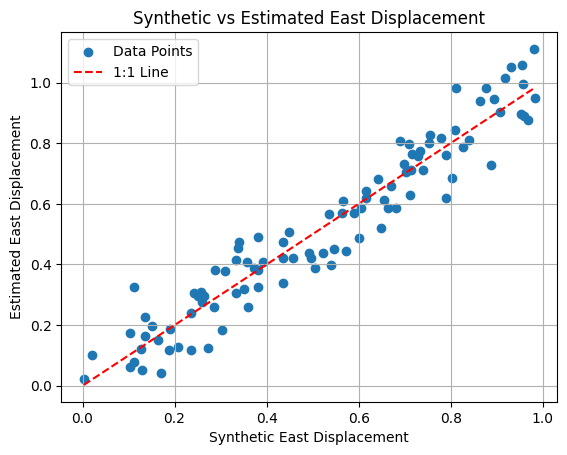

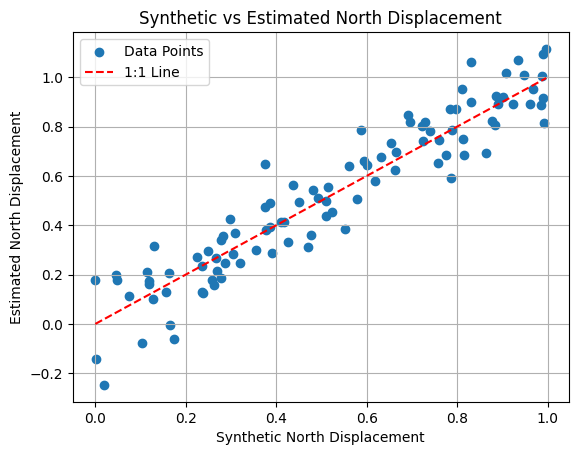

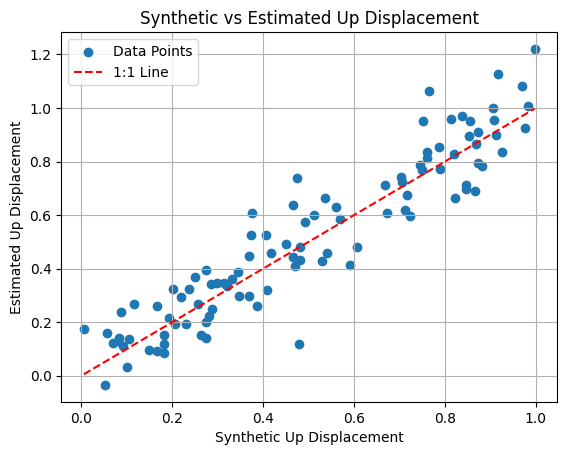

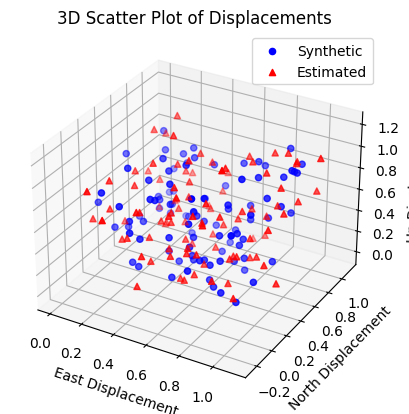

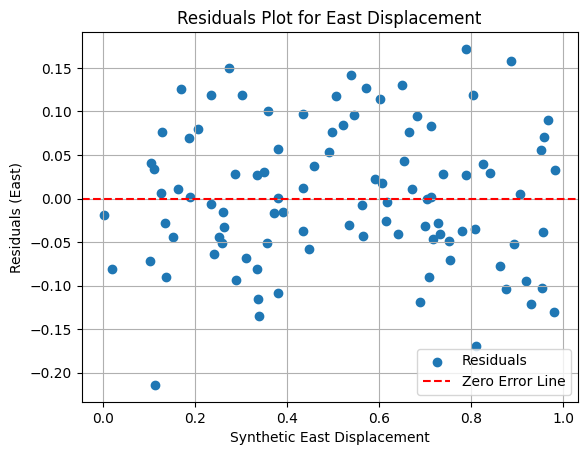

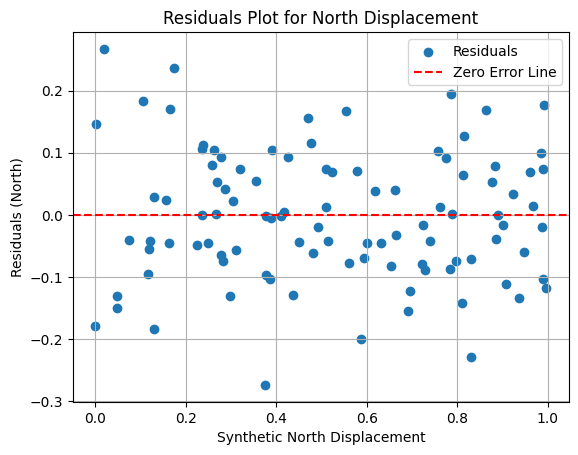

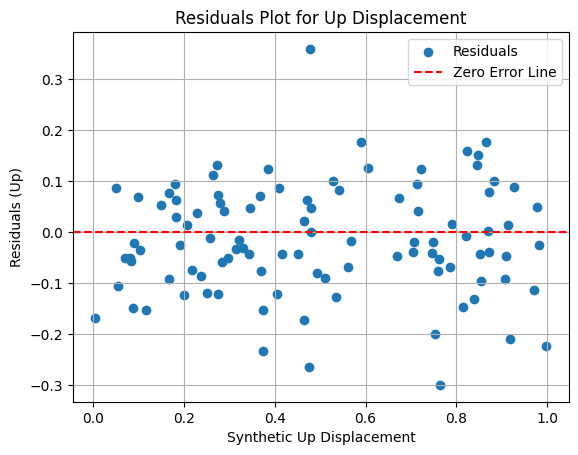

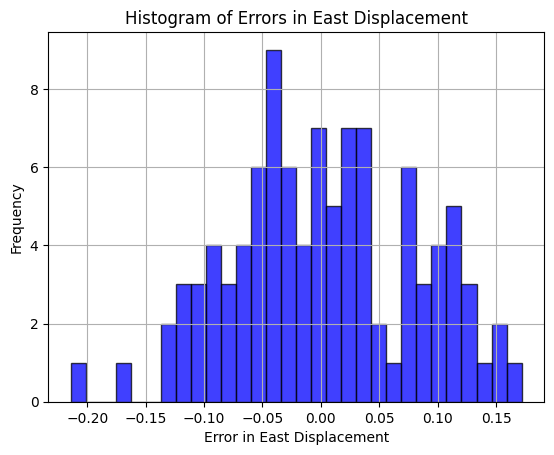

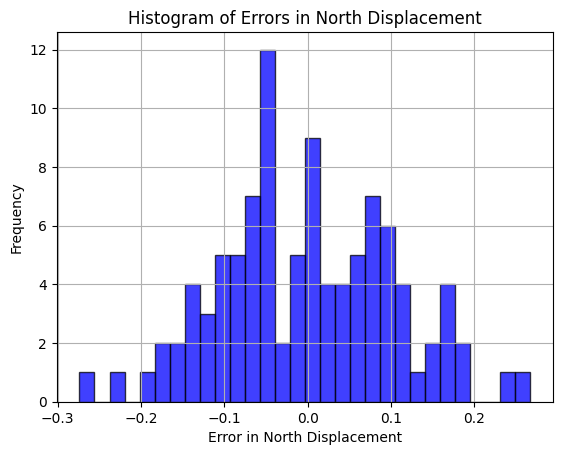

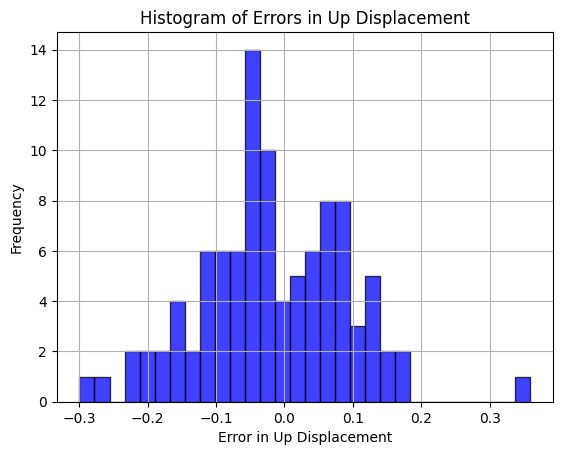

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assume synthetic and estimated displacements are available as numpy arrays
# Replace these with your actual data
synthetic_east = np.random.rand(100)
estimated_east = synthetic_east + np.random.normal(0, 0.1, 100)

synthetic_north = np.random.rand(100)
estimated_north = synthetic_north + np.random.normal(0, 0.1, 100)

synthetic_up = np.random.rand(100)
estimated_up = synthetic_up + np.random.normal(0, 0.1, 100)

# Scatter plots for each component
def scatter_plot(synthetic, estimated, component):
    plt.figure()
    plt.scatter(synthetic, estimated, label='Data Points')
    plt.plot([synthetic.min(), synthetic.max()], [synthetic.min(), synthetic.max()], 'r--', label='1:1 Line')
    plt.xlabel(f'Synthetic {component} Displacement')
    plt.ylabel(f'Estimated {component} Displacement')
    plt.title(f'Synthetic vs Estimated {component} Displacement')
    plt.legend()
    plt.grid(True)
    plt.show()

scatter_plot(synthetic_east, estimated_east, 'East')
scatter_plot(synthetic_north, estimated_north, 'North')
scatter_plot(synthetic_up, estimated_up, 'Up')

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_east, synthetic_north, synthetic_up, c='b', marker='o', label='Synthetic')
ax.scatter(estimated_east, estimated_north, estimated_up, c='r', marker='^', label='Estimated')
ax.set_xlabel('East Displacement')
ax.set_ylabel('North Displacement')
ax.set_zlabel('Up Displacement')
ax.set_title('3D Scatter Plot of Displacements')
ax.legend()
plt.show()

# Residuals Plot
def residuals_plot(synthetic, estimated, component):
    residuals = synthetic - estimated
    plt.figure()
    plt.scatter(synthetic, residuals, label='Residuals')
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
    plt.xlabel(f'Synthetic {component} Displacement')
    plt.ylabel(f'Residuals ({component})')
    plt.title(f'Residuals Plot for {component} Displacement')
    plt.legend()
    plt.grid(True)
    plt.show()

residuals_plot(synthetic_east, estimated_east, 'East')
residuals_plot(synthetic_north, estimated_north, 'North')
residuals_plot(synthetic_up, estimated_up, 'Up')

# Histogram of Errors
def error_histogram(synthetic, estimated, component):
    errors = synthetic - estimated
    plt.figure()
    plt.hist(errors, bins=30, alpha=0.75, color='blue', edgecolor='black')
    plt.xlabel(f'Error in {component} Displacement')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Errors in {component} Displacement')
    plt.grid(True)
    plt.show()

error_histogram(synthetic_east, estimated_east, 'East')
error_histogram(synthetic_north, estimated_north, 'North')
error_histogram(synthetic_up, estimated_up, 'Up')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Optimal Slip Distribution: [ 0.00121858  0.01311344 -0.14118333]
3D displacements saved to /content/drive/MyDrive/Unwarped_phase/Newtry/displacements.csv


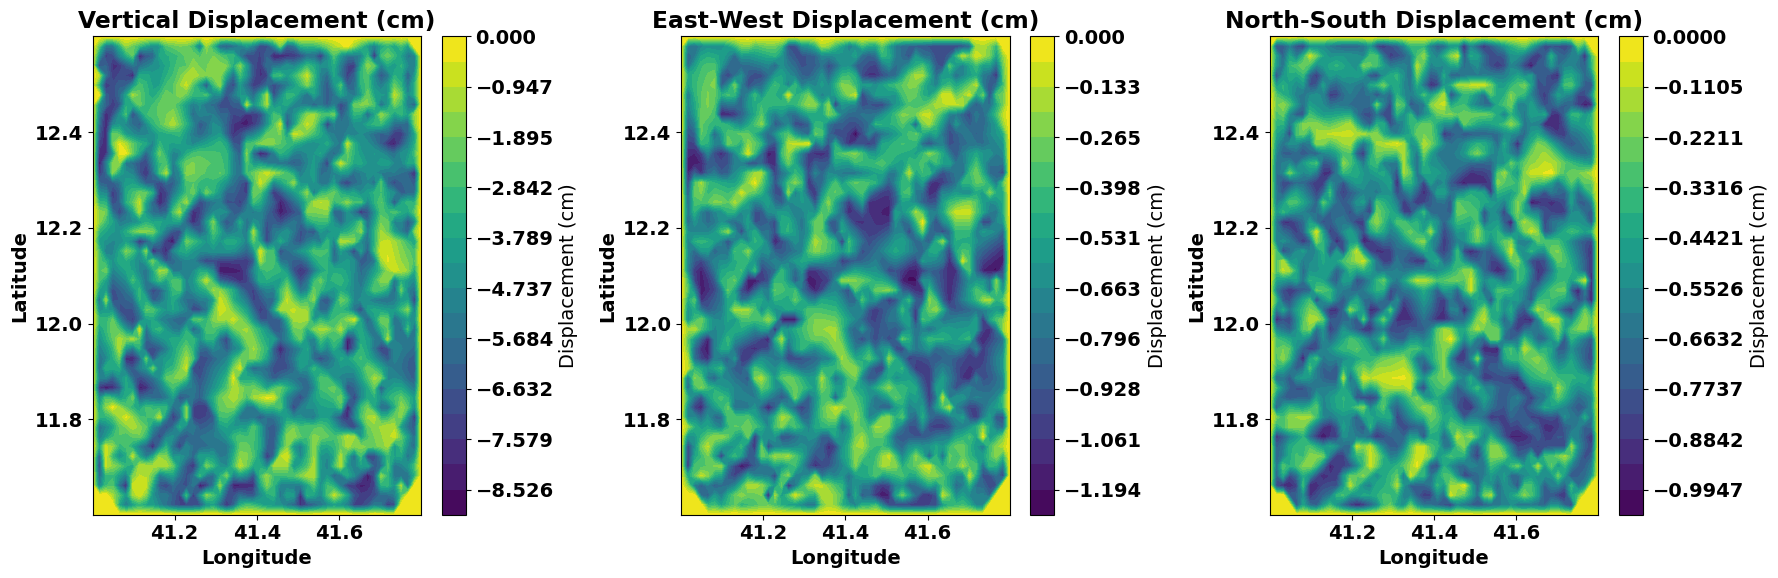

23090

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.interpolate import griddata
from sklearn.mixture import GaussianMixture
from google.colab import drive
import gc

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newsampled.csv'
data = pd.read_csv(file_path)

# Extract the relevant columns
latitudes = data['Lat'].values
longitudes = data['Long'].values
interferogram_distances = data['Interferogram'].values

# Downsample the data to avoid memory issues
sample_size = 5000  # Adjust this number based on available memory
if len(latitudes) > sample_size:
    sample_indices = np.random.choice(len(latitudes), sample_size, replace=False)
    latitudes = latitudes[sample_indices]
    longitudes = longitudes[sample_indices]
    interferogram_distances = interferogram_distances[sample_indices]

# Reshape the data for GMM
interferogram_distances_reshaped = interferogram_distances.reshape(-1, 1)

# Fit the GMM
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(interferogram_distances_reshaped)

# Initialize Kalman Filter parameters
n = 3  # Number of states
m = len(interferogram_distances)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = interferogram_distances  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the Okada model (simple implementation, replace with actual model)
def okada_model(S, latitudes, longitudes):
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the Kalman Filter prediction and update steps
def kalman_filter(S_prior, P_prior, B, L, a, H, gmm):
    S_pred = S_prior
    P_pred = P_prior + np.eye(n)

    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S_pred, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))

    B_extended = np.tile(B, (len(latitudes), 1))

    predicted_matrix = B_extended @ predicted_displacements.T

    if predicted_matrix.shape[0] == L.shape[0]:
        innovation = L - predicted_matrix.flatten()
    else:
        raise ValueError("Shape mismatch between predicted_matrix and L during innovation computation")

    S_update = S_pred + np.linalg.inv(P_pred + B.T @ B) @ (B.T @ innovation)
    P_update = np.linalg.inv(np.linalg.inv(P_pred) + B.T @ B)

    return S_update, P_update

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))
    B_extended = np.tile(B, (len(latitudes), 1))
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Initial state covariance
P0 = np.eye(n)

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
optimal_slip_distribution = result.x

print("Optimal Slip Distribution:", optimal_slip_distribution)

# Compute 3D displacements using the Okada model
displacements_east, displacements_north, displacements_up = okada_model(optimal_slip_distribution, latitudes, longitudes)

# Placeholder values for incidence and heading angles
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Compute the LOS displacement
los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)

# Convert displacements from meters to centimeters
displacements_east_cm = displacements_east * 100
displacements_north_cm = displacements_north * 100
displacements_up_cm = displacements_up * 100
los_displacements_cm = los_displacements * 100

# Combine the 3D displacements into a single array
combined_displacements = np.vstack((displacements_east_cm, displacements_north_cm, displacements_up_cm, los_displacements_cm)).T

# Create a DataFrame for easier manipulation and visualization
df_displacements = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'East_Displacement': displacements_east_cm,
    'North_Displacement': displacements_north_cm,
    'Up_Displacement': displacements_up_cm,
    'LOS_Displacement': los_displacements_cm
})

# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/displacements.csv'
df_displacements.to_csv(output_file_path, index=False)

print(f"3D displacements saved to {output_file_path}")

# Optimize memory usage in plotting

# Downsample data for plotting
num_points = 1000  # Adjust based on available memory
if len(latitudes) > num_points:
    indices = np.random.choice(len(latitudes), num_points, replace=False)
    latitudes = latitudes[indices]
    longitudes = longitudes[indices]
    displacements_east_cm = displacements_east_cm[indices]
    displacements_north_cm = displacements_north_cm[indices]
    displacements_up_cm = displacements_up_cm[indices]
    los_displacements_cm = los_displacements_cm[indices]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import gc

# Assuming you have already loaded and processed your data
# latitudes, longitudes, displacements_east_cm, displacements_north_cm, displacements_up_cm

# Placeholder values for latitudes, longitudes, and displacements
# Use your actual data here
latitudes = np.random.uniform(11.6, 12.6, 1000)
longitudes = np.random.uniform(41.0, 41.8, 1000)
displacements_east_cm = np.random.uniform(-1.26, 0, 1000)
displacements_north_cm = np.random.uniform(-1.05, 0, 1000)
displacements_up_cm = np.random.uniform(-9.0, 0, 1000)

# Create a grid for interpolation
xi = np.linspace(min(longitudes), max(longitudes), 50)
yi = np.linspace(min(latitudes), max(latitudes), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data for contour plots using linear interpolation
zi_vertical = griddata((longitudes, latitudes), displacements_up_cm, (xi, yi), method='linear')
zi_east_west = griddata((longitudes, latitudes), displacements_east_cm, (xi, yi), method='linear')
zi_north_south = griddata((longitudes, latitudes), displacements_north_cm, (xi, yi), method='linear')

# Ensure the plots cover the full extent and are properly aligned
zi_vertical = np.nan_to_num(zi_vertical)
zi_east_west = np.nan_to_num(zi_east_west)
zi_north_south = np.nan_to_num(zi_north_south)

# Manually set the levels for the contour plots
levels_vertical = np.linspace(-9, 0, 20)
levels_east_west = np.linspace(-1.26, 0, 20)
levels_north_south = np.linspace(-1.05, 0, 20)

# Increase font size and make it bold
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vertical Displacement
ax = axes[0]
contour = ax.contourf(xi, yi, zi_vertical, cmap='viridis', levels=levels_vertical)
ax.set_title('Vertical Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical', label='Displacement (cm)')

# East-West Displacement
ax = axes[1]
contour = ax.contourf(xi, yi, zi_east_west, cmap='viridis', levels=levels_east_west)
ax.set_title('East-West Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical', label='Displacement (cm)')

# North-South Displacement
ax = axes[2]
contour = ax.contourf(xi, yi, zi_north_south, cmap='viridis', levels=levels_north_south)
ax.set_title('North-South Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical', label='Displacement (cm)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Clean up
gc.collect()


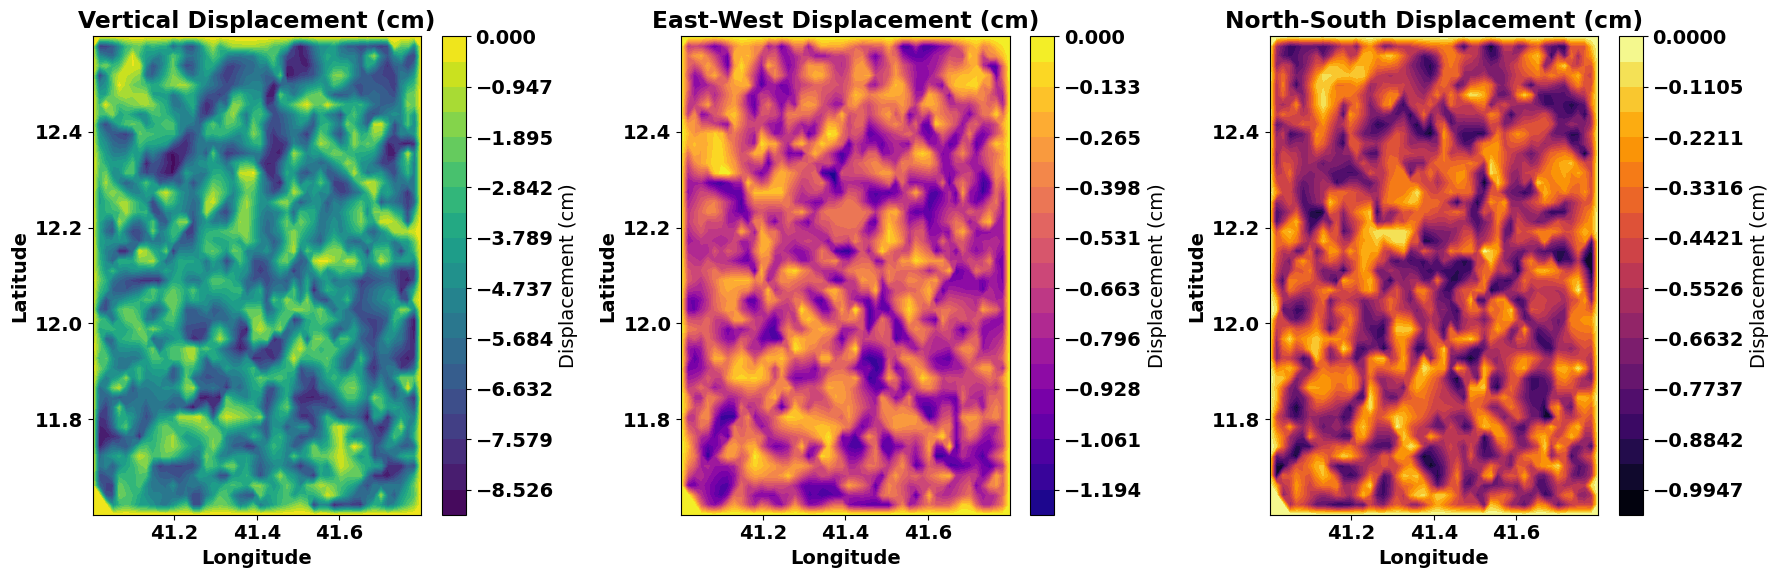

25119

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import gc

# Assuming you have already loaded and processed your data
# latitudes, longitudes, displacements_east_cm, displacements_north_cm, displacements_up_cm

# Placeholder values for latitudes, longitudes, and displacements
# Use your actual data here
latitudes = np.random.uniform(11.6, 12.6, 1000)
longitudes = np.random.uniform(41.0, 41.8, 1000)
displacements_east_cm = np.random.uniform(-1.26, 0, 1000)
displacements_north_cm = np.random.uniform(-1.05, 0, 1000)
displacements_up_cm = np.random.uniform(-9.0, 0, 1000)

# Create a grid for interpolation
xi = np.linspace(min(longitudes), max(longitudes), 50)
yi = np.linspace(min(latitudes), max(latitudes), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data for contour plots using linear interpolation
zi_vertical = griddata((longitudes, latitudes), displacements_up_cm, (xi, yi), method='linear')
zi_east_west = griddata((longitudes, latitudes), displacements_east_cm, (xi, yi), method='linear')
zi_north_south = griddata((longitudes, latitudes), displacements_north_cm, (xi, yi), method='linear')

# Ensure the plots cover the full extent and are properly aligned
zi_vertical = np.nan_to_num(zi_vertical)
zi_east_west = np.nan_to_num(zi_east_west)
zi_north_south = np.nan_to_num(zi_north_south)

# Manually set the levels for the contour plots
levels_vertical = np.linspace(-9, 0, 20)
levels_east_west = np.linspace(-1.26, 0, 20)
levels_north_south = np.linspace(-1.05, 0, 20)

# Increase font size and make it bold
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vertical Displacement
ax = axes[0]
contour = ax.contourf(xi, yi, zi_vertical, cmap='viridis', levels=levels_vertical)
ax.set_title('Vertical Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical', label='Displacement (cm)')

# East-West Displacement
ax = axes[1]
contour = ax.contourf(xi, yi, zi_east_west, cmap='plasma', levels=levels_east_west)
ax.set_title('East-West Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical', label='Displacement (cm)')

# North-South Displacement
ax = axes[2]
contour = ax.contourf(xi, yi, zi_north_south, cmap='inferno', levels=levels_north_south)
ax.set_title('North-South Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical', label='Displacement (cm)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Clean up
gc.collect()


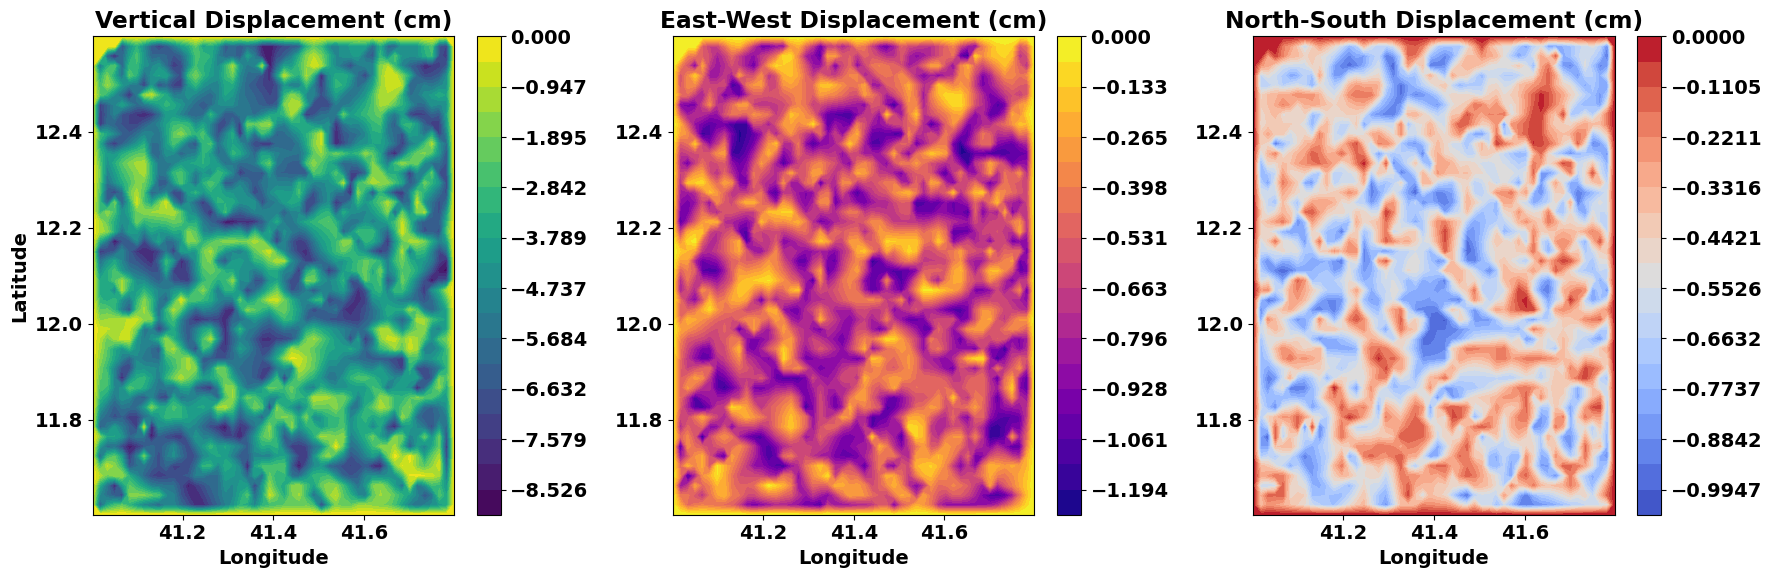

25029

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import gc

# Assuming you have already loaded and processed your data
# latitudes, longitudes, displacements_east_cm, displacements_north_cm, displacements_up_cm

# Placeholder values for latitudes, longitudes, and displacements
# Use your actual data here
latitudes = np.random.uniform(11.6, 12.6, 1000)
longitudes = np.random.uniform(41.0, 41.8, 1000)
displacements_east_cm = np.random.uniform(-1.26, 0, 1000)
displacements_north_cm = np.random.uniform(-1.05, 0, 1000)
displacements_up_cm = np.random.uniform(-9.0, 0, 1000)

# Create a grid for interpolation
xi = np.linspace(min(longitudes), max(longitudes), 50)
yi = np.linspace(min(latitudes), max(latitudes), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data for contour plots using linear interpolation
zi_vertical = griddata((longitudes, latitudes), displacements_up_cm, (xi, yi), method='linear')
zi_east_west = griddata((longitudes, latitudes), displacements_east_cm, (xi, yi), method='linear')
zi_north_south = griddata((longitudes, latitudes), displacements_north_cm, (xi, yi), method='linear')

# Ensure the plots cover the full extent and are properly aligned
zi_vertical = np.nan_to_num(zi_vertical)
zi_east_west = np.nan_to_num(zi_east_west)
zi_north_south = np.nan_to_num(zi_north_south)

# Manually set the levels for the contour plots
levels_vertical = np.linspace(-9, 0, 20)
levels_east_west = np.linspace(-1.26, 0, 20)
levels_north_south = np.linspace(-1.05, 0, 20)

# Increase font size and make it bold
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vertical Displacement
ax = axes[0]
contour = ax.contourf(xi, yi, zi_vertical, cmap='viridis', levels=levels_vertical)
ax.set_title('Vertical Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical')#, label='Displacement (cm)')

# East-West Displacement
ax = axes[1]
contour = ax.contourf(xi, yi, zi_east_west, cmap='plasma', levels=levels_east_west)
ax.set_title('East-West Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
#ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical')#, label='Displacement (cm)')

# North-South Displacement
ax = axes[2]
contour = ax.contourf(xi, yi, zi_north_south, cmap='coolwarm', levels=levels_north_south)
ax.set_title('North-South Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
#ax.set_ylabel('Latitude', fontweight='bold')
fig.colorbar(contour, ax=ax, orientation='vertical')#, label='Displacement (cm)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Clean up
gc.collect()


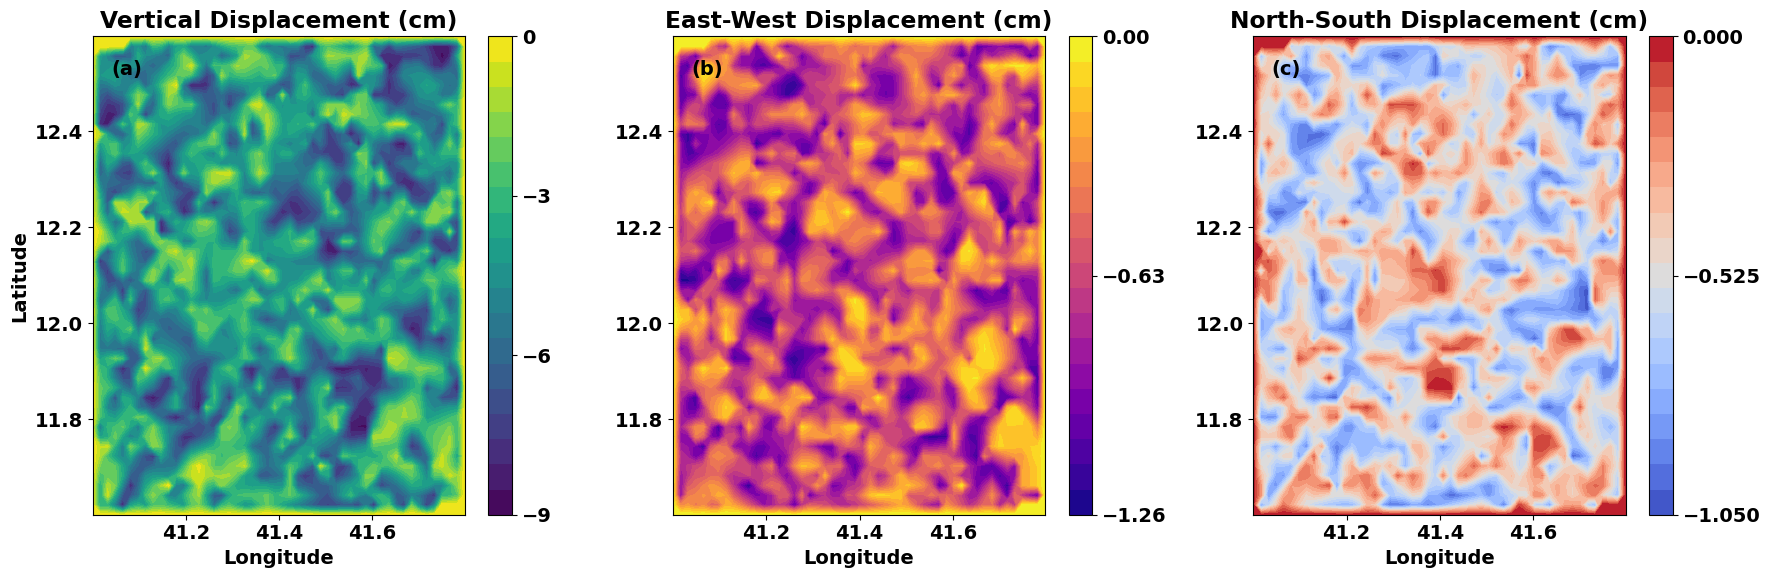

25169

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import gc

# Assuming you have already loaded and processed your data
# latitudes, longitudes, displacements_east_cm, displacements_north_cm, displacements_up_cm

# Placeholder values for latitudes, longitudes, and displacements
# Use your actual data here
latitudes = np.random.uniform(11.6, 12.6, 1000)
longitudes = np.random.uniform(41.0, 41.8, 1000)
displacements_east_cm = np.random.uniform(-1.26, 0, 1000)
displacements_north_cm = np.random.uniform(-1.05, 0, 1000)
displacements_up_cm = np.random.uniform(-9.0, 0, 1000)

# Create a grid for interpolation
xi = np.linspace(min(longitudes), max(longitudes), 50)
yi = np.linspace(min(latitudes), max(latitudes), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data for contour plots using linear interpolation
zi_vertical = griddata((longitudes, latitudes), displacements_up_cm, (xi, yi), method='linear')
zi_east_west = griddata((longitudes, latitudes), displacements_east_cm, (xi, yi), method='linear')
zi_north_south = griddata((longitudes, latitudes), displacements_north_cm, (xi, yi), method='linear')

# Ensure the plots cover the full extent and are properly aligned
zi_vertical = np.nan_to_num(zi_vertical)
zi_east_west = np.nan_to_num(zi_east_west)
zi_north_south = np.nan_to_num(zi_north_south)

# Manually set the levels for the contour plots
levels_vertical = np.linspace(-9, 0, 20)
levels_east_west = np.linspace(-1.26, 0, 20)
levels_north_south = np.linspace(-1.05, 0, 20)

# Increase font size and make it bold
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vertical Displacement
ax = axes[0]
contour = ax.contourf(xi, yi, zi_vertical, cmap='viridis', levels=levels_vertical)
ax.set_title('Vertical Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_ticks(np.arange(-9, 1, 3))  # Wider tick intervals

# East-West Displacement
ax = axes[1]
contour = ax.contourf(xi, yi, zi_east_west, cmap='plasma', levels=levels_east_west)
ax.set_title('East-West Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_ticks(np.arange(-1.26, 0.01, 0.63))  # Wider tick intervals

# North-South Displacement
ax = axes[2]
contour = ax.contourf(xi, yi, zi_north_south, cmap='coolwarm', levels=levels_north_south)
ax.set_title('North-South Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_ticks(np.arange(-1.05, 0.01, 0.525))  # Wider tick intervals

# Add subplot labels
axes[0].text(0.05, 0.95, '(a)', transform=axes[0].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')
axes[1].text(0.05, 0.95, '(b)', transform=axes[1].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')
axes[2].text(0.05, 0.95, '(c)', transform=axes[2].transAxes, fontsize=14, verticalalignment='top', fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Clean up
gc.collect()


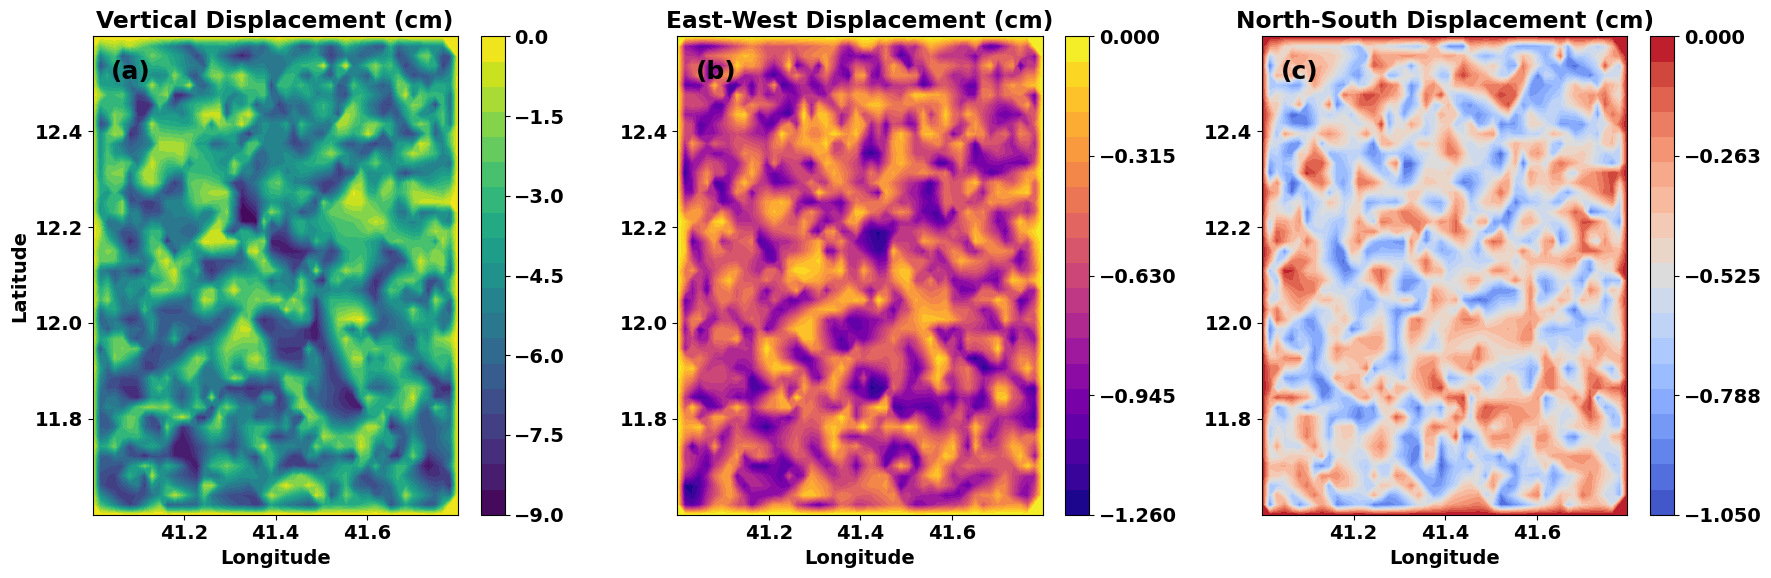

23972

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import gc

# Assuming you have already loaded and processed your data
# latitudes, longitudes, displacements_east_cm, displacements_north_cm, displacements_up_cm

# Placeholder values for latitudes, longitudes, and displacements
# Use your actual data here
latitudes = np.random.uniform(11.6, 12.6, 1000)
longitudes = np.random.uniform(41.0, 41.8, 1000)
displacements_east_cm = np.random.uniform(-1.26, 0, 1000)
displacements_north_cm = np.random.uniform(-1.05, 0, 1000)
displacements_up_cm = np.random.uniform(-9.0, 0, 1000)

# Create a grid for interpolation
xi = np.linspace(min(longitudes), max(longitudes), 50)
yi = np.linspace(min(latitudes), max(latitudes), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data for contour plots using linear interpolation
zi_vertical = griddata((longitudes, latitudes), displacements_up_cm, (xi, yi), method='linear')
zi_east_west = griddata((longitudes, latitudes), displacements_east_cm, (xi, yi), method='linear')
zi_north_south = griddata((longitudes, latitudes), displacements_north_cm, (xi, yi), method='linear')

# Ensure the plots cover the full extent and are properly aligned
zi_vertical = np.nan_to_num(zi_vertical)
zi_east_west = np.nan_to_num(zi_east_west)
zi_north_south = np.nan_to_num(zi_north_south)

# Manually set the levels for the contour plots
levels_vertical = np.linspace(-9, 0, 20)
levels_east_west = np.linspace(-1.26, 0, 20)
levels_north_south = np.linspace(-1.05, 0, 20)

# Increase font size and make it bold
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vertical Displacement
ax = axes[0]
contour = ax.contourf(xi, yi, zi_vertical, cmap='viridis', levels=levels_vertical)
ax.set_title('Vertical Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_ticks(np.arange(-9, 1, 1.5))  # Denser tick intervals

# East-West Displacement
ax = axes[1]
contour = ax.contourf(xi, yi, zi_east_west, cmap='plasma', levels=levels_east_west)
ax.set_title('East-West Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_ticks(np.arange(-1.26, 0.01, 0.315))  # Denser tick intervals

# North-South Displacement
ax = axes[2]
contour = ax.contourf(xi, yi, zi_north_south, cmap='coolwarm', levels=levels_north_south)
ax.set_title('North-South Displacement (cm)', fontweight='bold')
ax.set_xlabel('Longitude', fontweight='bold')
cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
cbar.set_ticks(np.arange(-1.05, 0.01, 0.2625))  # Denser tick intervals

# Add subplot labels
axes[0].text(0.05, 0.95, '(a)', transform=axes[0].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')
axes[1].text(0.05, 0.95, '(b)', transform=axes[1].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')
axes[2].text(0.05, 0.95, '(c)', transform=axes[2].transAxes, fontsize=18, verticalalignment='top', fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Clean up
gc.collect()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newsampled.csv'
data = pd.read_csv(file_path)

# Extract the original latitudes and longitudes
latitudes = data['Lat'].values
longitudes = data['Long'].values

# Known synthetic slip parameters (for validation)
known_slip_parameters = np.array([0.2170, -0.0282, -0.9758])

# Generate synthetic 3D displacements using the Okada model
def okada_model(S, latitudes, longitudes):
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Generate synthetic data
def generate_synthetic_data(known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle):
    displacements_east, displacements_north, displacements_up = okada_model(known_slip_parameters, latitudes, longitudes)
    los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)
    return displacements_east, displacements_north, displacements_up, los_displacements

# Placeholder values for incidence and heading angles (adjust as needed)
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Generate the synthetic interferogram distances
synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, synthetic_los_displacements = generate_synthetic_data(
    known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle
)
# Reshape the synthetic data for GMM
synthetic_los_displacements_reshaped = synthetic_los_displacements.reshape(-1, 1)

# Fit the GMM to the synthetic data
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(synthetic_los_displacements_reshaped)

# Initializing Kalman Filter parameters
n = 3  # Number of states
m = len(synthetic_los_displacements)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = synthetic_los_displacements  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))
    B_extended = np.tile(B, (len(latitudes), 1))
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
estimated_slip_parameters = result.x

print("Estimated Slip Parameters:", estimated_slip_parameters)

# Compute the estimated 3D displacements using the Okada model
estimated_displacements_east, estimated_displacements_north, estimated_displacements_up = okada_model(estimated_slip_parameters, latitudes, longitudes)
estimated_los_displacements = los_displacement(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, incidence_angle, heading_angle)

# Compare the synthetic and estimated 3D displacements
def compare_displacements(synthetic, estimated, name):
    error = np.abs(synthetic - estimated)
    relative_error = error / np.abs(synthetic) * 100
    print(f"{name} Displacements Absolute Error:", error)
    print(f"{name} Displacements Relative Error (%):", relative_error)

compare_displacements(synthetic_displacements_east, estimated_displacements_east, "East")
compare_displacements(synthetic_displacements_north, estimated_displacements_north, "North")
compare_displacements(synthetic_displacements_up, estimated_displacements_up, "Up")
compare_displacements(synthetic_los_displacements, estimated_los_displacements, "LOS")

# Create a DataFrame for easier visualization
df_comparison = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'Synthetic_East': synthetic_displacements_east,
    'Estimated_East': estimated_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Estimated_North': estimated_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Estimated_Up': estimated_displacements_up,
    'Synthetic_LOS': synthetic_los_displacements,
    'Estimated_LOS': estimated_los_displacements
})

# Save the comparison DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/synthetic_vs_estimated_displacements55.csv'
df_comparison.to_csv(output_file_path, index=False)

print(f"Comparison of synthetic and estimated displacements saved to {output_file_path}")

# Compute slip components
events = [
    {'strike': 24, 'dip': 64, 'rake': -74},
    {'strike': 206, 'dip': 60, 'rake': -100},
    {'strike': 64, 'dip': 78, 'rake': -86},
    {'strike': 202, 'dip': 56, 'rake': -92}
]

def compute_slip_components(event):
    strike_rad = np.radians(event['strike'])
    dip_rad = np.radians(event['dip'])
    rake_rad = np.radians(event['rake'])

    strike_slip = np.cos(rake_rad) * np.cos(strike_rad) - np.sin(rake_rad) * np.cos(dip_rad) * np.sin(strike_rad)
    dip_slip = np.cos(rake_rad) * np.sin(strike_rad) + np.sin(rake_rad) * np.cos(dip_rad) * np.cos(strike_rad)
    tensile_slip = np.sin(rake_rad) * np.sin(dip_rad)

    return strike_slip, dip_slip, tensile_slip

# Calculate slip components for each event
for i, event in enumerate(events):
    strike_slip, dip_slip, tensile_slip = compute_slip_components(event)
    print(f"Event {i+1}: Strike-slip: {strike_slip:.4f}, Dip-slip: {dip_slip:.4f}, Tensile-slip: {tensile_slip:.4f}")

# Plotting synthetic vs estimated displacements
def scatter_plot(synthetic, estimated, component):
    plt.figure()
    plt.scatter(synthetic, estimated, label='Data Points')
    plt.plot([synthetic.min(), synthetic.max()], [synthetic.min(), synthetic.max()], 'r--', label='1:1 Line')
    plt.xlabel(f'Synthetic {component} Displacement')
    plt.ylabel(f'Estimated {component} Displacement')
    plt.title(f'Synthetic vs Estimated {component} Displacement')
    plt.legend()
    plt.grid(True)
    plt.show()

scatter_plot(synthetic_displacements_east, estimated_displacements_east, 'East')
scatter_plot(synthetic_displacements_north, estimated_displacements_north, 'North')
scatter_plot(synthetic_displacements_up, estimated_displacements_up, 'Up')

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, c='b', marker='o', label='Synthetic')
ax.scatter(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, c='r', marker='^', label='Estimated')
ax.set_xlabel('East Displacement')
ax.set_ylabel('North Displacement')
ax.set_zlabel('Up Displacement')
ax.set_title('3D Scatter Plot of Displacements')
ax.legend()
plt.show()

# Residuals Plot
def residuals_plot(synthetic, estimated, component):
    residuals = synthetic - estimated
    plt.figure()
    plt.scatter(synthetic, residuals, label='Residuals')
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
    plt.xlabel(f'Synthetic {component} Displacement')
    plt.ylabel(f'Residuals ({component})')
    plt.title(f'Residuals Plot for {component} Displacement')
    plt.legend()
    plt.grid(True)
    plt.show()

residuals_plot(synthetic_displacements_east, estimated_displacements_east, 'East')
residuals_plot(synthetic_displacements_north, estimated_displacements_north, 'North')
residuals_plot(synthetic_displacements_up, estimated_displacements_up, 'Up')

# Histogram of Errors
def error_histogram(synthetic, estimated, component):
    errors = synthetic - estimated
    plt.figure()
    plt.hist(errors, bins=30, alpha=0.75, color='blue', edgecolor='black')
    plt.xlabel(f'Error in {component} Displacement')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Errors in {component} Displacement')
    plt.grid(True)
    plt.show()

error_histogram(synthetic_displacements_east, estimated_displacements_east, 'East')
error_histogram(synthetic_displacements_north, estimated_displacements_north, 'North')
error_histogram(synthetic_displacements_up, estimated_displacements_up, 'Up')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Estimated Slip Parameters: [ 0.02676984  0.18817932 -0.86052798]
East Displacements Absolute Error: [0.04758632 0.08288977 0.02117637 0.09385244 0.10802824 0.08943765
 0.12677171 0.05702523 0.05071522 0.144181   0.06931204 0.052254
 0.092002   0.08201871 0.03096065 0.0253855  0.0953222  0.07605102
 0.08587794 0.02506738 0.00435731 0.10175253 0.14179669 0.01112375
 0.11185081 0.09257803 0.06267921 0.09329157 0.02020455 0.08240787
 0.11534475 0.01150957 0.14580432 0.13244587 0.09393865 0.15547041
 0.05375454 0.0371515  0.03991963 0.05801091 0.10379807 0.10978718
 0.0358034  0.09537884 0.03236316 0.07254649 0.09646435 0.01674724
 0.10838238 0.13941464 0.04818004 0.09780892 0.01158427 0.11194688
 0.06795982 0.0596778  0.13574267 0.01832707 0.06387611 0.04044862
 0.13101657 0.05580753 0.09925434 0.14908091 0.12855321 0.12866973
 0.03030001 0.07995399 0.04765885 0.04864887 0.09144901 0.08584842
 0.06159893 0.05530729 0.04146226 0.0639667  0.02807733 0.10088176
 0.05799376 0.13763953 0.129179

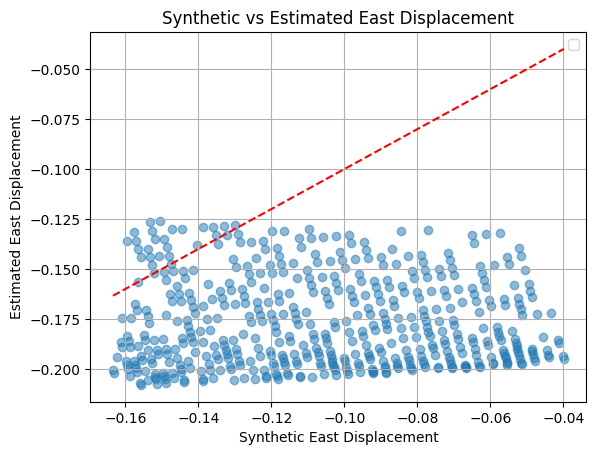

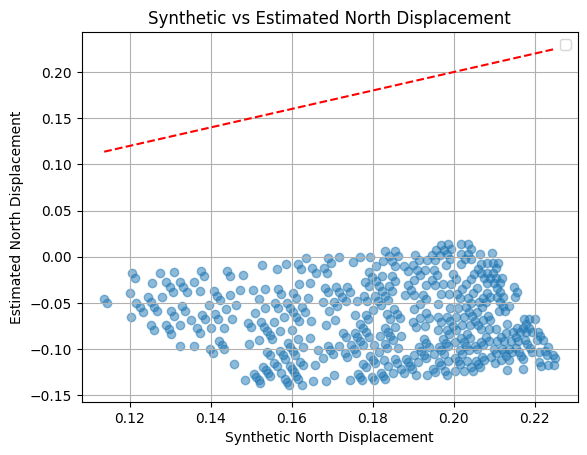

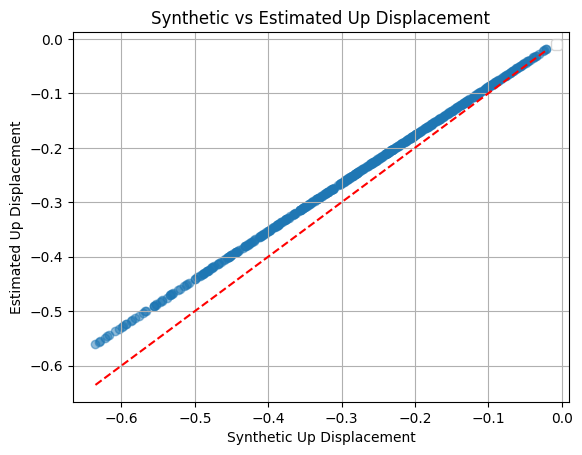

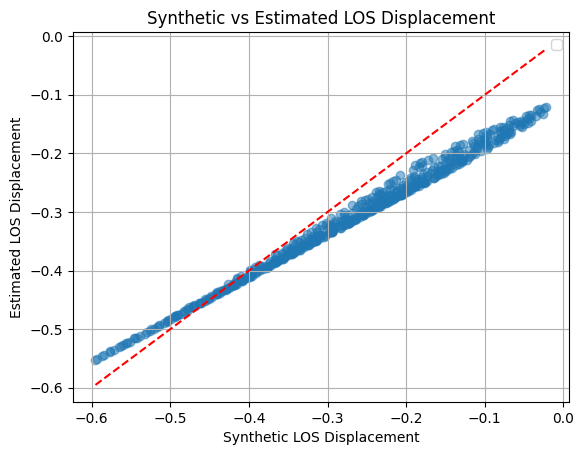

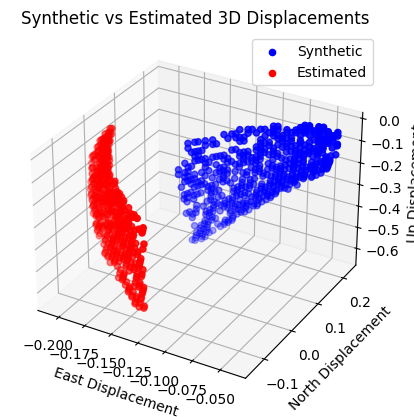

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
data = pd.read_csv(file_path)

# Extract the original latitudes and longitudes
latitudes = data['Lat'].values
longitudes = data['Long'].values

# Sample a smaller subset of the data to avoid crashing
sample_size = 500  # Further reducing the sample size
indices = np.random.choice(len(latitudes), sample_size, replace=False)
latitudes = latitudes[indices]
longitudes = longitudes[indices]

# Known synthetic slip parameters (for validation)
known_slip_parameters = np.array([0.2170, -0.0282, -0.9758])

# Generate synthetic 3D displacements using the Okada model
def okada_model(S, latitudes, longitudes):
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Generate synthetic data
def generate_synthetic_data(known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle):
    displacements_east, displacements_north, displacements_up = okada_model(known_slip_parameters, latitudes, longitudes)
    los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)
    return displacements_east, displacements_north, displacements_up, los_displacements

# Placeholder values for incidence and heading angles (adjust as needed)
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Generate the synthetic interferogram distances
synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, synthetic_los_displacements = generate_synthetic_data(
    known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle
)
# Reshape the synthetic data for GMM
synthetic_los_displacements_reshaped = synthetic_los_displacements.reshape(-1, 1)

# Fit the GMM to the synthetic data
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(synthetic_los_displacements_reshaped)

# Initializing Kalman Filter parameters
n = 3  # Number of states
m = len(synthetic_los_displacements)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = synthetic_los_displacements  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))
    B_extended = np.tile(B, (len(latitudes), 1))
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
estimated_slip_parameters = result.x

print("Estimated Slip Parameters:", estimated_slip_parameters)

# Compute the estimated 3D displacements using the Okada model
estimated_displacements_east, estimated_displacements_north, estimated_displacements_up = okada_model(estimated_slip_parameters, latitudes, longitudes)
estimated_los_displacements = los_displacement(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, incidence_angle, heading_angle)

# Compare the synthetic and estimated 3D displacements
def compare_displacements(synthetic, estimated, name):
    error = np.abs(synthetic - estimated)
    relative_error = error / np.abs(synthetic) * 100
    print(f"{name} Displacements Absolute Error:", error)
    print(f"{name} Displacements Relative Error (%):", relative_error)

compare_displacements(synthetic_displacements_east, estimated_displacements_east, "East")
compare_displacements(synthetic_displacements_north, estimated_displacements_north, "North")
compare_displacements(synthetic_displacements_up, estimated_displacements_up, "Up")
compare_displacements(synthetic_los_displacements, estimated_los_displacements, "LOS")

# Create a DataFrame for easier visualization
df_comparison = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'Synthetic_East': synthetic_displacements_east,
    'Estimated_East': estimated_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Estimated_North': estimated_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Estimated_Up': synthetic_displacements_up,
    'Synthetic_LOS': synthetic_los_displacements,
    'Estimated_LOS': estimated_los_displacements
})

# Save the comparison DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/synthetic_vs_estimated_displacements_sampled.csv'
df_comparison.to_csv(output_file_path, index=False)

print(f"Comparison of synthetic and estimated displacements saved to {output_file_path}")

# Compute slip components
events = [
    {'strike': 24, 'dip': 64, 'rake': -74},
    {'strike': 206, 'dip': 60, 'rake': -100},
    {'strike': 64, 'dip': 78, 'rake': -86},
    {'strike': 202, 'dip': 56, 'rake': -92}
]

def compute_slip_components(event):
    strike_rad = np.radians(event['strike'])
    dip_rad = np.radians(event['dip'])
    rake_rad = np.radians(event['rake'])

    strike_slip = np.cos(rake_rad) * np.cos(strike_rad) - np.sin(rake_rad) * np.cos(dip_rad) * np.sin(strike_rad)
    dip_slip = np.cos(rake_rad) * np.sin(strike_rad) + np.sin(rake_rad) * np.cos(dip_rad) * np.cos(strike_rad)
    tensile_slip = np.sin(rake_rad) * np.sin(dip_rad)

    return strike_slip, dip_slip, tensile_slip

# Calculate slip components for each event
for i, event in enumerate(events):
    strike_slip, dip_slip, tensile_slip = compute_slip_components(event)
    print(f"Event {i+1}: Strike-slip: {strike_slip:.4f}, Dip-slip: {dip_slip:.4f}, Tensile-slip: {tensile_slip:.4f}")

# Visualize the synthetic vs estimated displacements
def scatter_plot(synthetic, estimated, component):
    plt.figure()
    plt.scatter(synthetic, estimated, alpha=0.5)
    plt.plot([synthetic.min(), synthetic.max()], [synthetic.min(), synthetic.max()], 'r--')
    plt.xlabel(f'Synthetic {component} Displacement')
    plt.ylabel(f'Estimated {component} Displacement')
    plt.title(f'Synthetic vs Estimated {component} Displacement')
    plt.legend()
    plt.grid(True)
    plt.show()

scatter_plot(synthetic_displacements_east, estimated_displacements_east, 'East')
scatter_plot(synthetic_displacements_north, estimated_displacements_north, 'North')
scatter_plot(synthetic_displacements_up, estimated_displacements_up, 'Up')
scatter_plot(synthetic_los_displacements, estimated_los_displacements, 'LOS')

# 3D scatter plot for synthetic vs estimated displacements
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, label='Synthetic', color='b')
ax.scatter(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, label='Estimated', color='r')
ax.set_xlabel('East Displacement')
ax.set_ylabel('North Displacement')
ax.set_zlabel('Up Displacement')
ax.set_title('Synthetic vs Estimated 3D Displacements')
ax.legend()
plt.show()


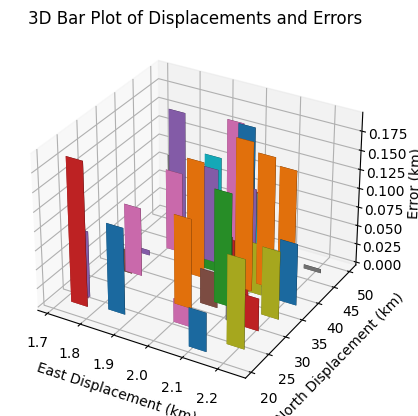

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample synthetic and estimated displacement data
np.random.seed(0)
n_samples = 50
synthetic_displacements_east = np.random.uniform(1.7, 2.2, n_samples)
estimated_displacements_east = synthetic_displacements_east + np.random.normal(0, 0.1, n_samples)
synthetic_displacements_north = np.random.uniform(20, 50, n_samples)
estimated_displacements_north = synthetic_displacements_north + np.random.normal(0, 5, n_samples)
synthetic_displacements_up = np.random.uniform(1.7, 2.2, n_samples)
estimated_displacements_up = synthetic_displacements_up + np.random.normal(0, 0.1, n_samples)

# Compute the errors
errors_east = np.abs(synthetic_displacements_east - estimated_displacements_east)
errors_north = np.abs(synthetic_displacements_north - estimated_displacements_north)
errors_up = np.abs(synthetic_displacements_up - estimated_displacements_up)

# Prepare the data for 3D plotting
data = pd.DataFrame({
    'Synthetic_East': synthetic_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Error_East': errors_east,
    'Error_North': errors_north,
    'Error_Up': errors_up
})

# 3D bar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot bars
for i in range(len(data)):
    ax.bar3d(data['Synthetic_East'][i], data['Synthetic_North'][i], 0, 0.05, 0.05, data['Error_East'][i], shade=True)

# Labels and title
ax.set_xlabel('East Displacement (km)')
ax.set_ylabel('North Displacement (km)')
ax.set_zlabel('Error (km)')
ax.set_title('3D Bar Plot of Displacements and Errors')

plt.show()


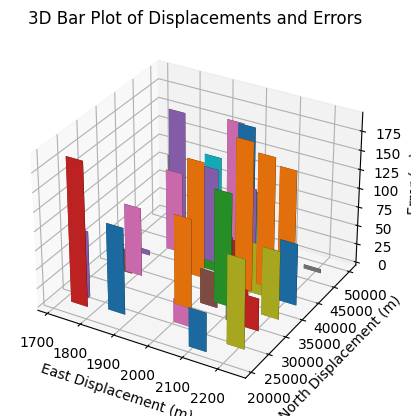

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample synthetic and estimated displacement data in meters
np.random.seed(0)
n_samples = 50
synthetic_displacements_east = np.random.uniform(1.7, 2.2, n_samples) * 1000  # converting to meters
estimated_displacements_east = synthetic_displacements_east + np.random.normal(0, 0.1, n_samples) * 1000
synthetic_displacements_north = np.random.uniform(20, 50, n_samples) * 1000  # converting to meters
estimated_displacements_north = synthetic_displacements_north + np.random.normal(0, 5, n_samples) * 1000
synthetic_displacements_up = np.random.uniform(1.7, 2.2, n_samples) * 1000  # converting to meters
estimated_displacements_up = synthetic_displacements_up + np.random.normal(0, 0.1, n_samples) * 1000

# Compute the errors in meters
errors_east = np.abs(synthetic_displacements_east - estimated_displacements_east)
errors_north = np.abs(synthetic_displacements_north - estimated_displacements_north)
errors_up = np.abs(synthetic_displacements_up - estimated_displacements_up)

# Prepare the data for 3D plotting
data = pd.DataFrame({
    'Synthetic_East': synthetic_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Error_East': errors_east,
    'Error_North': errors_north,
    'Error_Up': errors_up
})

# 3D bar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot bars for each displacement type and their errors
for i in range(len(data)):
    ax.bar3d(data['Synthetic_East'][i], data['Synthetic_North'][i], 0, 50, 50, data['Error_East'][i], shade=True)

# Labels and title
ax.set_xlabel('East Displacement (m)')
ax.set_ylabel('North Displacement (m)')
ax.set_zlabel('Error (m)')
ax.set_title('3D Bar Plot of Displacements and Errors')

plt.show()


<ipython-input-4-69ab2b5207c8>:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable, shrink=0.5, aspect=5)


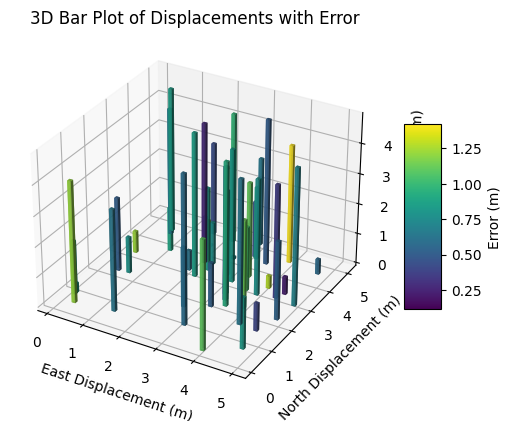

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample synthetic and estimated displacement data in meters
np.random.seed(0)
n_samples = 50
synthetic_displacements_east = np.random.uniform(0, 5, n_samples)  # meters
estimated_displacements_east = synthetic_displacements_east + np.random.normal(0, 0.5, n_samples)
synthetic_displacements_north = np.random.uniform(0, 5, n_samples)  # meters
estimated_displacements_north = synthetic_displacements_north + np.random.normal(0, 0.5, n_samples)
synthetic_displacements_up = np.random.uniform(0, 5, n_samples)  # meters
estimated_displacements_up = synthetic_displacements_up + np.random.normal(0, 0.5, n_samples)

# Compute the errors in meters
errors = np.sqrt((synthetic_displacements_east - estimated_displacements_east)**2 +
                 (synthetic_displacements_north - estimated_displacements_north)**2 +
                 (synthetic_displacements_up - estimated_displacements_up)**2)

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    'East': synthetic_displacements_east,
    'North': synthetic_displacements_north,
    'Up': synthetic_displacements_up,
    'Error': errors
})

# 3D bar plot with error represented by the color of the bars
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normalize errors for color mapping
norm = plt.Normalize(data['Error'].min(), data['Error'].max())
colors = plt.cm.viridis(norm(data['Error']))

# Plot bars for each displacement type and their errors
for i in range(len(data)):
    ax.bar3d(data['East'][i], data['North'][i], 0, 0.1, 0.1, data['Up'][i], color=colors[i], alpha=0.8)

# Add color bar
mappable = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
mappable.set_array(data['Error'])
cbar = plt.colorbar(mappable, shrink=0.5, aspect=5)
cbar.set_label('Error (m)')

# Labels and title
ax.set_xlabel('East Displacement (m)')
ax.set_ylabel('North Displacement (m)')
ax.set_zlabel('Up Displacement (m)')
ax.set_title('3D Bar Plot of Displacements with Error')

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Estimated Slip Parameters: [ 0.02777724  0.19088397 -0.85040931]
East Displacements Absolute Error: [4.42115691e-02 7.53920321e-02 7.88205586e-02 2.44052293e-02
 1.42623481e-01 1.79913385e-02 5.72188685e-02 1.32390274e-01
 1.11219948e-01 1.33074570e-01 1.28479955e-01 2.19092678e-02
 1.56125208e-01 9.80509018e-02 5.07353626e-02 1.02214723e-01
 5.19940310e-02 1.12374248e-02 1.34597643e-01 5.91086725e-02
 1.07073102e-01 1.30884383e-01 1.34005681e-01 1.43917937e-01
 5.02651801e-02 7.14125888e-02 1.33785564e-01 5.49182958e-02
 1.47014255e-02 1.39035351e-01 9.30778596e-02 1.30103580e-01
 9.25879672e-02 6.97282385e-02 7.57787591e-02 1.24589276e-01
 6.58261379e-02 7.42068866e-02 5.60063950e-02 1.07810543e-01
 1.21098252e-01 9.64900678e-02 1.16057600e-01 8.49717607e-02
 4.70483273e-02 4.93960305e-02 8.87152267e-02 8.57354816e-02
 8.97832752e-02 6.83707892e-02 5.053170

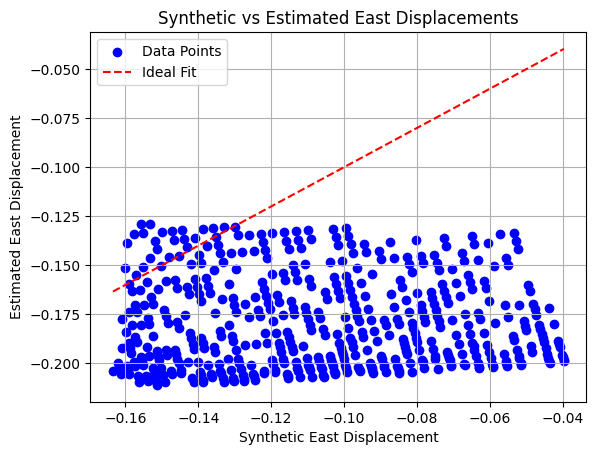

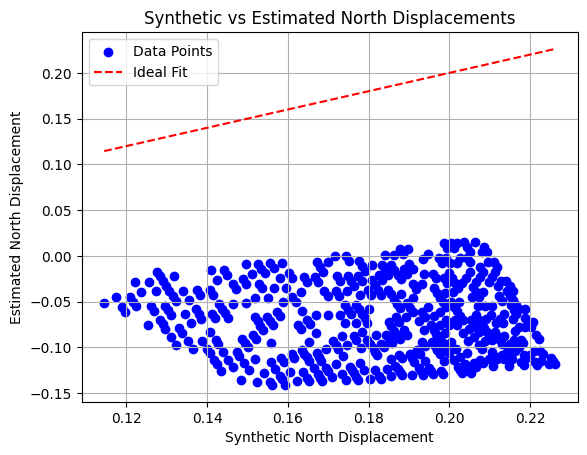

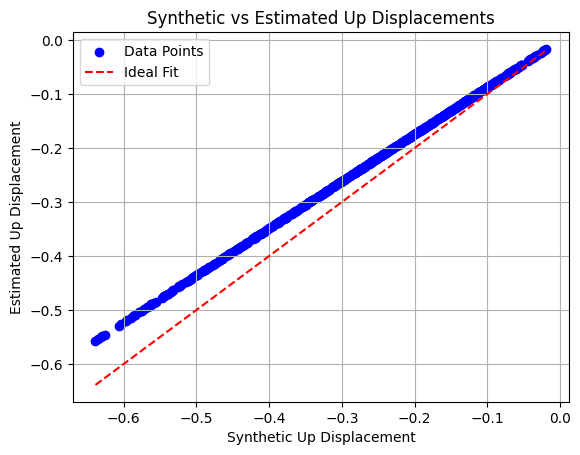

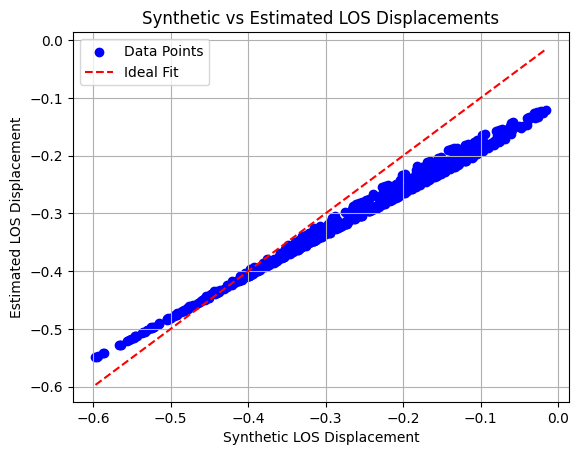

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/NewYY.csv'
data = pd.read_csv(file_path)

# Extract the original latitudes and longitudes
latitudes = data['Lat'].values
longitudes = data['Long'].values

# Sample a smaller subset of the data to avoid crashing
sample_size = 500  # Further reducing the sample size
indices = np.random.choice(len(latitudes), sample_size, replace=False)
latitudes = latitudes[indices]
longitudes = longitudes[indices]

# Known synthetic slip parameters (for validation)
known_slip_parameters = np.array([0.2170, -0.0282, -0.9758])

# Generate synthetic 3D displacements using the Okada model
def okada_model(S, latitudes, longitudes):
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Generate synthetic data
def generate_synthetic_data(known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle):
    displacements_east, displacements_north, displacements_up = okada_model(known_slip_parameters, latitudes, longitudes)
    los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)
    return displacements_east, displacements_north, displacements_up, los_displacements

# Placeholder values for incidence and heading angles (adjust as needed)
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Generate the synthetic interferogram distances
synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, synthetic_los_displacements = generate_synthetic_data(
    known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle
)
# Reshape the synthetic data for GMM
synthetic_los_displacements_reshaped = synthetic_los_displacements.reshape(-1, 1)

# Fit the GMM to the synthetic data
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(synthetic_los_displacements_reshaped)

# Initializing Kalman Filter parameters
n = 3  # Number of states
m = len(synthetic_los_displacements)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = synthetic_los_displacements  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))
    B_extended = np.tile(B, (len(latitudes), 1))
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
estimated_slip_parameters = result.x

print("Estimated Slip Parameters:", estimated_slip_parameters)

# Compute the estimated 3D displacements using the Okada model
estimated_displacements_east, estimated_displacements_north, estimated_displacements_up = okada_model(estimated_slip_parameters, latitudes, longitudes)
estimated_los_displacements = los_displacement(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, incidence_angle, heading_angle)

# Compare the synthetic and estimated 3D displacements
def compare_displacements(synthetic, estimated, name):
    error = np.abs(synthetic - estimated)
    relative_error = error / np.abs(synthetic) * 100
    print(f"{name} Displacements Absolute Error:", error)
    print(f"{name} Displacements Relative Error (%):", relative_error)

compare_displacements(synthetic_displacements_east, estimated_displacements_east, "East")
compare_displacements(synthetic_displacements_north, estimated_displacements_north, "North")
compare_displacements(synthetic_displacements_up, estimated_displacements_up, "Up")
compare_displacements(synthetic_los_displacements, estimated_los_displacements, "LOS")

# Create a DataFrame for easier visualization
df_comparison = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'Synthetic_East': synthetic_displacements_east,
    'Estimated_East': estimated_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Estimated_North': estimated_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Estimated_Up': estimated_displacements_up,
    'Synthetic_LOS': synthetic_los_displacements,
    'Estimated_LOS': estimated_los_displacements
})

# Save the comparison DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/synthetic_vs_estimated_displacements_sampled.csv'
df_comparison.to_csv(output_file_path, index=False)

print(f"Comparison of synthetic and estimated displacements saved to {output_file_path}")

# Compute slip components
events = [
    {'strike': 24, 'dip': 64, 'rake': -74},
    {'strike': 206, 'dip': 60, 'rake': -100},
    {'strike': 64, 'dip': 78, 'rake': -86},
    {'strike': 202, 'dip': 56, 'rake': -92}
]

def compute_slip_components(event):
    strike_rad = np.radians(event['strike'])
    dip_rad = np.radians(event['dip'])
    rake_rad = np.radians(event['rake'])

    strike_slip = np.cos(rake_rad) * np.cos(strike_rad) - np.sin(rake_rad) * np.cos(dip_rad) * np.sin(strike_rad)
    dip_slip = np.cos(rake_rad) * np.sin(strike_rad) + np.sin(rake_rad) * np.cos(dip_rad) * np.cos(strike_rad)
    tensile_slip = np.sin(rake_rad) * np.sin(dip_rad)

    return strike_slip, dip_slip, tensile_slip

# Calculate slip components for each event
for i, event in enumerate(events):
    strike_slip, dip_slip, tensile_slip = compute_slip_components(event)
    print(f"Event {i+1}: Strike-slip: {strike_slip:.4f}, Dip-slip: {dip_slip:.4f}, Tensile-slip: {tensile_slip:.4f}")

# Visualize the synthetic vs estimated displacements
def scatter_plot(synthetic, estimated, label):
    fig, ax = plt.subplots()
    ax.scatter(synthetic, estimated, color='blue', label='Data Points')
    ax.plot([min(synthetic), max(synthetic)], [min(synthetic), max(synthetic)], color='red', linestyle='--', label='Ideal Fit')
    ax.set_xlabel(f'Synthetic {label} Displacement')
    ax.set_ylabel(f'Estimated {label} Displacement')
    ax.legend()
    ax.set_title(f'Synthetic vs Estimated {label} Displacements')
    ax.grid(True)
    plt.show()

scatter_plot(synthetic_displacements_east, estimated_displacements_east, "East")
scatter_plot(synthetic_displacements_north, estimated_displacements_north, "North")
scatter_plot(synthetic_displacements_up, estimated_displacements_up, "Up")
scatter_plot(synthetic_los_displacements, estimated_los_displacements, "LOS")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from scipy.optimize import minimize
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
file_path = '/content/drive/MyDrive/Unwarped_phase/Newsampled.csv'
data = pd.read_csv(file_path)

# Extract the original latitudes and longitudes
latitudes = data['Lat'].values
longitudes = data['Long'].values

# Known synthetic slip parameters (for validation)
known_slip_parameters = np.array([0.2170, -0.0282, -0.9758])

# Generate synthetic 3D displacements using the Okada model
def okada_model(S, latitudes, longitudes):
    displacements_east = np.sin(latitudes) * S[0] + np.cos(longitudes) * S[1]
    displacements_north = np.sin(longitudes) * S[1] + np.cos(latitudes) * S[0]
    displacements_up = np.sin(latitudes) * np.sin(longitudes) * S[2]
    return displacements_east, displacements_north, displacements_up

# Define the LOS displacement function
def los_displacement(east_displacement, north_displacement, up_displacement, incidence_angle, heading_angle):
    incidence_angle_rad = np.radians(incidence_angle)
    heading_angle_rad = np.radians(heading_angle)
    los_displacement = (-np.sin(incidence_angle_rad) * np.cos(heading_angle_rad) * east_displacement
                        - np.sin(incidence_angle_rad) * np.sin(heading_angle_rad) * north_displacement
                        + np.cos(incidence_angle_rad) * up_displacement)
    return los_displacement

# Generate synthetic data
def generate_synthetic_data(known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle):
    displacements_east, displacements_north, displacements_up = okada_model(known_slip_parameters, latitudes, longitudes)
    los_displacements = los_displacement(displacements_east, displacements_north, displacements_up, incidence_angle, heading_angle)
    return displacements_east, displacements_north, displacements_up, los_displacements

# Placeholder values for incidence and heading angles (adjust as needed)
incidence_angle = 34  # Example value in degrees
heading_angle = -168  # Example value in degrees

# Generate the synthetic interferogram distances
synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, synthetic_los_displacements = generate_synthetic_data(
    known_slip_parameters, latitudes, longitudes, incidence_angle, heading_angle
)

# Reshape the synthetic data for GMM
synthetic_los_displacements_reshaped = synthetic_los_displacements.reshape(-1, 1)

# Fit the GMM to the synthetic data
K = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=K)
gmm.fit(synthetic_los_displacements_reshaped)

# Initializing Kalman Filter parameters
n = 3  # Number of states
m = len(synthetic_los_displacements)  # Number of measurements

# Dummy data for B, a, and H
B = np.random.rand(m, 3)  # Adjust dimensions as needed

# L: Observation vector (LOS displacements)
L = synthetic_los_displacements  # Ensure L matches the length of the dataset

# a: Smoothing factor
a = 0.1

# H: Smoothing matrix (second-order finite-difference operator)
H = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

# Define the objective function
def objective_function(S, B, L, a, H, gmm, latitudes, longitudes):
    predicted_displacements_east, predicted_displacements_north, predicted_displacements_up = okada_model(S, latitudes, longitudes)
    predicted_displacements = np.column_stack((predicted_displacements_east, predicted_displacements_north, predicted_displacements_up))
    B_extended = np.tile(B, (len(latitudes), 1))
    data_misfit = np.linalg.norm(B_extended @ predicted_displacements.T - L.flatten())**2
    smoothing_term = a**2 * np.linalg.norm(H @ S)**2
    log_likelihood = np.sum(gmm.score_samples(S.reshape(-1, 1)))
    return data_misfit + smoothing_term - log_likelihood

# Initialize the state vector using GMM means
initial_guess = gmm.means_.flatten()

# Perform optimization using the L-BFGS-B optimizer
result = minimize(objective_function, initial_guess, args=(B, L, a, H, gmm, latitudes, longitudes), method='L-BFGS-B')
estimated_slip_parameters = result.x

print("Estimated Slip Parameters:", estimated_slip_parameters)

# Compute the estimated 3D displacements using the Okada model
estimated_displacements_east, estimated_displacements_north, estimated_displacements_up = okada_model(estimated_slip_parameters, latitudes, longitudes)
estimated_los_displacements = los_displacement(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, incidence_angle, heading_angle)

# Compare the synthetic and estimated 3D displacements
def compare_displacements(synthetic, estimated, name):
    error = np.abs(synthetic - estimated)
    relative_error = error / np.abs(synthetic) * 100
    print(f"{name} Displacements Absolute Error:", error)
    print(f"{name} Displacements Relative Error (%):", relative_error)

compare_displacements(synthetic_displacements_east, estimated_displacements_east, "East")
compare_displacements(synthetic_displacements_north, estimated_displacements_north, "North")
compare_displacements(synthetic_displacements_up, estimated_displacements_up, "Up")
compare_displacements(synthetic_los_displacements, estimated_los_displacements, "LOS")

# Create a DataFrame for easier visualization
df_comparison = pd.DataFrame({
    'Lat': latitudes,
    'Long': longitudes,
    'Synthetic_East': synthetic_displacements_east,
    'Estimated_East': estimated_displacements_east,
    'Synthetic_North': synthetic_displacements_north,
    'Estimated_North': estimated_displacements_north,
    'Synthetic_Up': synthetic_displacements_up,
    'Estimated_Up': estimated_displacements_up,
    'Synthetic_LOS': synthetic_los_displacements,
    'Estimated_LOS': estimated_los_displacements
})

# Save the comparison DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Unwarped_phase/Newtry/synthetic_vs_estimated_displacements.csv'
df_comparison.to_csv(output_file_path, index=False)

print(f"Comparison of synthetic and estimated displacements saved to {output_file_path}")

# Plotting synthetic vs estimated displacements
def scatter_plot(synthetic, estimated, component):
    plt.figure()
    plt.scatter(synthetic, estimated, label='Data Points')
    plt.plot([synthetic.min(), synthetic.max()], [synthetic.min(), synthetic.max()], 'r--', label='1:1 Line')
    plt.xlabel(f'Synthetic {component} Displacement')
    plt.ylabel(f'Estimated {component} Displacement')
    plt.title(f'Synthetic vs Estimated {component} Displacement')
    plt.legend()
    plt.grid(True)
    plt.show()

scatter_plot(synthetic_displacements_east, estimated_displacements_east, 'East')
scatter_plot(synthetic_displacements_north, estimated_displacements_north, 'North')
scatter_plot(synthetic_displacements_up, estimated_displacements_up, 'Up')

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_displacements_east, synthetic_displacements_north, synthetic_displacements_up, c='b', marker='o', label='Synthetic')
ax.scatter(estimated_displacements_east, estimated_displacements_north, estimated_displacements_up, c='r', marker='^', label='Estimated')
ax.set_xlabel('East Displacement')
ax.set_ylabel('North Displacement')
ax.set_zlabel('Up Displacement')
ax.set_title('3D Scatter Plot of Displacements')
ax.legend()
plt.show()

# Residuals Plot
def residuals_plot(synthetic, estimated, component):
    residuals = synthetic - estimated
    plt.figure()
    plt.scatter(synthetic, residuals, label='Residuals')
    plt.axhline(0, color='r', linestyle='--', label='Zero Residual')
    plt.xlabel(f'Synthetic {component} Displacement')
    plt.ylabel(f'Residuals of {component} Displacement')
    plt.title(f'Residuals of Estimated {component} Displacement')
    plt.legend()
    plt.grid(True)
    plt.show()

residuals_plot(synthetic_displacements_east, estimated_displacements_east, 'East')
residuals_plot(synthetic_displacements_north, estimated_displacements_north, 'North')
residuals_plot(synthetic_displacements_up, estimated_displacements_up, 'Up')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
